# Hands-On Data Preprocessing in Python
Learn how to effectively prepare data for successful data analytics
    
    AUTHOR: Dr. Roy Jafari 

# Chapter 17: Case Study 3: United States Counties Clustering Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Introduction to the source of the data

### First Data Source
https://www.ers.usda.gov/data-products/county-level-data-sets/

    - Education.xls
    - PopulationEstimates.xls
    - PovertyEstimates.xls
    - Unemployment.xlsx

#### Education..xls

In [2]:
edu_df = pd.read_excel('Education.xls')
edu_df

,"Educational attainment for adults age 25 and older for the U.S., States, and counties, 1970-2019",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46
0,"Sources: U.S. Census Bureau, 1970, 1980, 1990,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"For definitions of rural classifications, see ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"This table was prepared by USDA, Economic Rese...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FIPS Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,Percent of adults completing some college or a...,Percent of adults with a bachelor's degree or ...,"Less than a high school diploma, 2015-19","High school diploma only, 2015-19","Some college or associate's degree, 2015-19","Bachelor's degree or higher, 2015-19",Percent of adults with less than a high school...,Percent of adults with a high school diploma o...,Percent of adults completing some college or a...,Percent of adults with a bachelor's degree or ...
4,00000,US,United States,NaN,NaN,NaN,NaN,52373312,34158051,11650730,...,27.4,24.4,26472261,59472748,63756905,70920162,11.9989,26.9568,28.8987,32.1455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,72145,PR,Vega Baja Municipio,1,1,1,1,NaN,NaN,NaN,...,21.4,14.4,10494,9681,8905,7834,28.4282,26.2258,24.1236,21.2223
3283,72147,PR,Vieques Municipio,7,12,7,12,NaN,NaN,NaN,...,13.7,10.1,1792,2440,875,1121,28.7733,39.1779,14.0495,17.9994
3284,72149,PR,Villalba Municipio,2,2,2,2,NaN,NaN,NaN,...,18,12.8,3330,5809,2987,3015,21.9933,38.366,19.7279,19.9128
3285,72151,PR,Yabucoa Municipio,1,1,1,1,NaN,NaN,NaN,...,18.3,12.1,6927,6132,6494,4293,29.0489,25.715,27.2331,18.003


#### PopulationEstimates.xls

In [3]:
pop_df = pd.read_excel('PopulationEstimates.xls')
pop_df

,"Population estimates for the U.S., States, and counties, 2010-19 (see the second tab in this workbook for variable name descriptions)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164
0,These data were posted to the ERS website (at ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FIPStxt,State,Area_Name,Rural-urban_Continuum Code_2003,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2003,Urban_Influence_Code_2013,Economic_typology_2015,CENSUS_2010_POP,ESTIMATES_BASE_2010,...,R_DOMESTIC_MIG_2019,R_NET_MIG_2011,R_NET_MIG_2012,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017,R_NET_MIG_2018,R_NET_MIG_2019
2,00000,US,United States,NaN,NaN,NaN,NaN,NaN,308745538,308758105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01000,AL,Alabama,NaN,NaN,NaN,NaN,NaN,4779736,4780125,...,1.9175,0.578434,1.18631,1.52255,0.563489,0.626357,0.745172,1.09037,1.77379,2.48374
4,01001,AL,Autauga County,2,2,2,2,0,54571,54597,...,4.84731,6.01818,-6.22612,-3.90223,1.97044,-1.71287,4.77717,0.849656,0.540916,4.56006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3270,72145,PR,"Vega Baja Municipio, Puerto Rico",1,1,1,1,NaN,59662,59662,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3271,72147,PR,"Vieques Municipio, Puerto Rico",7,7,12,12,NaN,9301,9301,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3272,72149,PR,"Villalba Municipio, Puerto Rico",2,2,2,2,NaN,26073,26073,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3273,72151,PR,"Yabucoa Municipio, Puerto Rico",1,1,1,1,NaN,37941,37941,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### PovertyEstimates.xls

In [4]:
pov_df = pd.read_excel('PovertyEstimates.xls')
pov_df

,"Poverty estimates for the U.S., States, and counties, 2019",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,"Source: U.S. Department of Commerce, Bureau of...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"For definitions of rural classifications, see ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"This table was prepared by USDA, Economic Rese...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FIPStxt,Stabr,Area_name,Rural-urban_Continuum_Code_2003,Urban_Influence_Code_2003,Rural-urban_Continuum_Code_2013,Urban_Influence_Code_2013,POVALL_2019,CI90LBALL_2019,CI90UBALL_2019,...,CI90UB517P_2019,MEDHHINC_2019,CI90LBINC_2019,CI90UBINC_2019,POV04_2019,CI90LB04_2019,CI90UB04_2019,PCTPOV04_2019,CI90LB04P_2019,CI90UB04P_2019
4,00000,US,United States,NaN,NaN,NaN,NaN,39490096,39248096,39732096,...,16,65712,65594,65830,3457689,3405854,3509524,18.2,17.9,18.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,56037,WY,Sweetwater County,5,8,5,8,3453,2743,4163,...,11.1,80639,73437,87841,NaN,NaN,NaN,NaN,NaN,NaN
3193,56039,WY,Teton County,7,8,7,8,1396,1073,1719,...,6.7,98837,86531,111143,NaN,NaN,NaN,NaN,NaN,NaN
3194,56041,WY,Uinta County,7,8,7,8,1699,1264,2134,...,11.1,70756,63191,78321,NaN,NaN,NaN,NaN,NaN,NaN
3195,56043,WY,Washakie County,7,11,7,11,845,626,1064,...,17.4,55122,50050,60194,NaN,NaN,NaN,NaN,NaN,NaN


#### Unemployment.xlsx

In [5]:
employment_df = pd.read_excel('Unemployment.xlsx')
employment_df

,"Unemployment and median household income for the United States, States, and counties, 2000-20",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91
0,Sources: Unemployment: U.S. Department of Labo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"For definitions of rural classifications, see ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"This table was prepared by USDA, Economic Rese...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FIPS_Code,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,...,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
4,00000,US,United States,NaN,NaN,NaN,142601576,136904853,5696723,3.99485,...,163140305,157154185,5986120,3.66931,160611064,147677360,12933704,8.05281,65712,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,72145,PR,"Vega Baja Municipio, PR",1,1,1,19805,17607,2198,11.1,...,13172,11910,1262,9.6,NaN,NaN,NaN,NaN,NaN,NaN
3275,72147,PR,"Vieques Municipio, PR",7,12,0,2441,2120,321,13.2,...,2616,2433,183,7,NaN,NaN,NaN,NaN,NaN,NaN
3276,72149,PR,"Villalba Municipio, PR",2,2,1,7636,6648,988,12.9,...,7492,6307,1185,15.8,NaN,NaN,NaN,NaN,NaN,NaN
3277,72151,PR,"Yabucoa Municipio, PR",1,1,1,10613,9005,1608,15.2,...,8840,7685,1155,13.1,NaN,NaN,NaN,NaN,NaN,NaN


### Second Data Source
https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VOQCHQ

    - dataverse_files.zip if unzipped includes: countypres_2000-2020.csv

In [6]:
election_df = pd.read_csv('countypres_2000-2020.csv')
election_df

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,2000,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,AL GORE,DEMOCRAT,4942.0,17208.0,20191203,TOTAL
1,2000,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,GEORGE W. BUSH,REPUBLICAN,11993.0,17208.0,20191203,TOTAL
2,2000,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,RALPH NADER,GREEN,160.0,17208.0,20191203,TOTAL
3,2000,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,OTHER,OTHER,113.0,17208.0,20191203,TOTAL
4,2000,ALABAMA,AL,BALDWIN,1003.0,PRESIDENT,AL GORE,DEMOCRAT,13997.0,56480.0,20191203,TOTAL
...,...,...,...,...,...,...,...,...,...,...,...,...
72612,2020,WYOMING,WY,WASHAKIE,56043.0,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,3245.0,4032.0,20210622,TOTAL
72613,2020,WYOMING,WY,WESTON,56045.0,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,360.0,3560.0,20210622,TOTAL
72614,2020,WYOMING,WY,WESTON,56045.0,US PRESIDENT,JO JORGENSEN,LIBERTARIAN,46.0,3560.0,20210622,TOTAL
72615,2020,WYOMING,WY,WESTON,56045.0,US PRESIDENT,OTHER,OTHER,47.0,3560.0,20210622,TOTAL


# The preprocessing

### Transforming election_df to partisan_df

In [7]:
BM = election_df['mode'] == 'TOTAL'
election_df = pd.DataFrame(election_df[BM].drop(columns = ['mode']))
election_df

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version
0,2000,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,AL GORE,DEMOCRAT,4942.0,17208.0,20191203
1,2000,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,GEORGE W. BUSH,REPUBLICAN,11993.0,17208.0,20191203
2,2000,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,RALPH NADER,GREEN,160.0,17208.0,20191203
3,2000,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,OTHER,OTHER,113.0,17208.0,20191203
4,2000,ALABAMA,AL,BALDWIN,1003.0,PRESIDENT,AL GORE,DEMOCRAT,13997.0,56480.0,20191203
...,...,...,...,...,...,...,...,...,...,...,...
72612,2020,WYOMING,WY,WASHAKIE,56043.0,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,3245.0,4032.0,20210622
72613,2020,WYOMING,WY,WESTON,56045.0,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,360.0,3560.0,20210622
72614,2020,WYOMING,WY,WESTON,56045.0,US PRESIDENT,JO JORGENSEN,LIBERTARIAN,46.0,3560.0,20210622
72615,2020,WYOMING,WY,WESTON,56045.0,US PRESIDENT,OTHER,OTHER,47.0,3560.0,20210622


In [8]:
election_df.groupby(['state_po','county_name']).size().index

MultiIndex([('AK',  'DISTRICT 1'),
            ('AK', 'DISTRICT 10'),
            ('AK', 'DISTRICT 11'),
            ('AK', 'DISTRICT 12'),
            ('AK', 'DISTRICT 13'),
            ('AK', 'DISTRICT 14'),
            ('AK', 'DISTRICT 15'),
            ('AK', 'DISTRICT 16'),
            ('AK', 'DISTRICT 17'),
            ('AK', 'DISTRICT 18'),
            ...
            ('WY',    'NIOBRARA'),
            ('WY',        'PARK'),
            ('WY',      'PLATTE'),
            ('WY',    'SHERIDAN'),
            ('WY',    'SUBLETTE'),
            ('WY',  'SWEETWATER'),
            ('WY',       'TETON'),
            ('WY',       'UINTA'),
            ('WY',    'WASHAKIE'),
            ('WY',      'WESTON')],
           names=['state_po', 'county_name'], length=3151)

In [9]:
partisanElection_df = pd.DataFrame(index = election_df.groupby(['state_po','county_name','year']).size().index,
                    columns = ['partisanism'])
partisanElection_df

partisanism
state_po county_name year            
AK       DISTRICT 1  2000         NaN
                     2004         NaN
                     2008         NaN
                     2012         NaN
                     2016         NaN
...                               ...
WY       WESTON      2004         NaN
                     2008         NaN
                     2012         NaN
                     2016         NaN
                     2020         NaN

[18050 rows x 1 columns]

In [10]:
for i, row in partisanElection_df.iterrows():
    state= i[0]
    county= i[1]
    year = i[2]
    
    BM = (election_df.state_po== state) & (
        election_df.county_name==county) & (
        election_df.year==year)
    
    wdf = election_df[BM]
    
    numerator = 0
    denominator = 0
    for wi,wrow in wdf.iterrows():
        denominator += wrow.candidatevotes
        if(wrow.party=='DEMOCRAT'):
            numerator -= wrow.candidatevotes
        if(wrow.party=='REPUBLICAN'):
            numerator += wrow.candidatevotes
    partisanism  = numerator/denominator
    partisanElection_df.at[i,'partisanism'] = partisanism
    print(i,partisanism)
        

('AK', 'DISTRICT 1', 2000) 0.5103665865384616
('AK', 'DISTRICT 1', 2004) 0.25352788710761254
('AK', 'DISTRICT 1', 2008) 0.22266857962697273
('AK', 'DISTRICT 1', 2012) 0.5673400673400674
('AK', 'DISTRICT 1', 2016) 0.09144320578487496
('AK', 'DISTRICT 1', 2020) 0.004648619086683074
('AK', 'DISTRICT 10', 2000) 0.39160288158487166
('AK', 'DISTRICT 10', 2004) 0.28604651162790695
('AK', 'DISTRICT 10', 2008) 0.23472840605520925
('AK', 'DISTRICT 10', 2012) 0.5455098934550989
('AK', 'DISTRICT 10', 2016) 0.49192477876106194
('AK', 'DISTRICT 10', 2020) 0.477822400713967
('AK', 'DISTRICT 11', 2000) 0.27464183381088825
('AK', 'DISTRICT 11', 2004) 0.45420345489443376
('AK', 'DISTRICT 11', 2008) 0.5890938576930874
('AK', 'DISTRICT 11', 2012) 0.4443285830147144
('AK', 'DISTRICT 11', 2016) 0.44400866962534835
('AK', 'DISTRICT 11', 2020) 0.3731652239367708
('AK', 'DISTRICT 12', 2000) 0.33877121431390605
('AK', 'DISTRICT 12', 2004) 0.3985647952722668
('AK', 'DISTRICT 12', 2008) 0.46817762551060743
('AK',

('AK', 'DISTRICT 35', 2012) 0.1405077899596076
('AK', 'DISTRICT 35', 2016) 0.039371820393718206
('AK', 'DISTRICT 35', 2020) -0.023955652346070087
('AK', 'DISTRICT 36', 2000) 0.1904249596557289
('AK', 'DISTRICT 36', 2004) 0.2597121523644627
('AK', 'DISTRICT 36', 2008) 0.29027423947250114
('AK', 'DISTRICT 36', 2012) -0.3932019308125503
('AK', 'DISTRICT 36', 2016) 0.21381897386253632
('AK', 'DISTRICT 36', 2020) 0.14184244511407662
('AK', 'DISTRICT 37', 2000) 0.17979315831344472
('AK', 'DISTRICT 37', 2004) 0.206605222734255
('AK', 'DISTRICT 37', 2008) 0.16998928188638798
('AK', 'DISTRICT 37', 2012) -0.2569780853517878
('AK', 'DISTRICT 37', 2016) -0.09541683129197945
('AK', 'DISTRICT 37', 2020) -0.03928432516530533
('AK', 'DISTRICT 38', 2000) 0.09083601286173633
('AK', 'DISTRICT 38', 2004) 0.01832512315270936
('AK', 'DISTRICT 38', 2008) -0.10228215767634855
('AK', 'DISTRICT 38', 2012) -0.270325799823892
('AK', 'DISTRICT 38', 2016) -0.3169774288518155
('AK', 'DISTRICT 38', 2020) -0.276467257

('AL', 'COVINGTON', 2012) 0.5832198664332491
('AL', 'COVINGTON', 2016) 0.6825595984943539
('AL', 'COVINGTON', 2020) 0.6807228915662651
('AL', 'CRENSHAW', 2000) 0.1791449426485923
('AL', 'CRENSHAW', 2004) 0.378
('AL', 'CRENSHAW', 2008) 0.3784771896359879
('AL', 'CRENSHAW', 2012) 0.35540666874415705
('AL', 'CRENSHAW', 2016) 0.4546034785383756
('AL', 'CRENSHAW', 2020) 0.47816230920356656
('AL', 'CULLMAN', 2000) 0.31834038950042337
('AL', 'CULLMAN', 2004) 0.533460259725498
('AL', 'CULLMAN', 2008) 0.6523721852428834
('AL', 'CULLMAN', 2012) 0.6949821516672955
('AL', 'CULLMAN', 2016) 0.7707601721543051
('AL', 'CULLMAN', 2020) 0.7742228381639626
('AL', 'DALE', 2000) 0.35980007592053653
('AL', 'DALE', 2004) 0.5011793099665405
('AL', 'DALE', 2008) 0.44596273291925465
('AL', 'DALE', 2012) 0.4215120978606456
('AL', 'DALE', 2016) 0.5010933916475545
('AL', 'DALE', 2020) 0.4627115209241058
('AL', 'DALLAS', 2000) -0.19535311958405546
('AL', 'DALLAS', 2004) -0.2067517363915361
('AL', 'DALLAS', 2008) -0

('AL', 'PERRY', 2004) -0.36737280463516203
('AL', 'PERRY', 2008) -0.45104724792985873
('AL', 'PERRY', 2012) -0.5020495163141498
('AL', 'PERRY', 2016) -0.4579386131110269
('AL', 'PERRY', 2020) -0.4820267686424474
('AL', 'PICKENS', 2000) 0.01908665105386417
('AL', 'PICKENS', 2004) 0.1374288217257994
('AL', 'PICKENS', 2008) 0.08344094566405086
('AL', 'PICKENS', 2012) 0.06960774112995526
('AL', 'PICKENS', 2016) 0.15552295116327813
('AL', 'PICKENS', 2020) 0.16259826230864707
('AL', 'PIKE', 2000) 0.16132397572078908
('AL', 'PIKE', 2004) 0.265000420769166
('AL', 'PIKE', 2008) 0.1522751701898961
('AL', 'PIKE', 2012) 0.13666973842773092
('AL', 'PIKE', 2016) 0.20025820170109357
('AL', 'PIKE', 2020) 0.17383137056571057
('AL', 'RANDOLPH', 2000) 0.19850991286778633
('AL', 'RANDOLPH', 2004) 0.36773691812020887
('AL', 'RANDOLPH', 2008) 0.39589753466872113
('AL', 'RANDOLPH', 2012) 0.39873052510098095
('AL', 'RANDOLPH', 2016) 0.5314616668302738
('AL', 'RANDOLPH', 2020) 0.5865091815077974
('AL', 'RUSSEL

('AR', 'DALLAS', 2016) 0.12414290869722122
('AR', 'DESHA', 2000) -0.26095661846496104
('AR', 'DESHA', 2004) -0.24144609425435765
('AR', 'DESHA', 2008) -0.1218469431380932
('AR', 'DESHA', 2012) -0.12375565610859729
('AR', 'DESHA', 2016) -0.07258632840028188
('AR', 'DREW', 2000) -0.05133400878081729
('AR', 'DREW', 2004) 0.049607937269963195
('AR', 'DREW', 2008) 0.19092284417549168
('AR', 'DREW', 2012) 0.1895070104025328
('AR', 'DREW', 2016) 0.24306292645943897
('AR', 'FAULKNER', 2000) 0.14050520262869662
('AR', 'FAULKNER', 2004) 0.19015428228752113
('AR', 'FAULKNER', 2008) 0.2527259039801841
('AR', 'FAULKNER', 2012) 0.3159913169319826
('AR', 'FAULKNER', 2016) 0.30965556420560947
('AR', 'FRANKLIN', 2000) 0.09820846905537459
('AR', 'FRANKLIN', 2004) 0.16092742488681575
('AR', 'FRANKLIN', 2008) 0.3925868725868726
('AR', 'FRANKLIN', 2012) 0.4441896024464832
('AR', 'FRANKLIN', 2016) 0.5410635155096012
('AR', 'FULTON', 2000) 0.014605647517039922
('AR', 'FULTON', 2004) 0.03067608476286579
('AR'

('AR', 'POPE', 2008) 0.4332623760134064
('AR', 'POPE', 2012) 0.4715005626498361
('AR', 'POPE', 2016) 0.49873720590190085
('AR', 'PRAIRIE', 2000) 0.08525805531793555
('AR', 'PRAIRIE', 2004) 0.1291390728476821
('AR', 'PRAIRIE', 2008) 0.34753031647441585
('AR', 'PRAIRIE', 2012) 0.40528494110156
('AR', 'PRAIRIE', 2016) 0.4909988385598142
('AR', 'PULASKI', 2000) -0.097946536008368
('AR', 'PULASKI', 2004) -0.0997509192266635
('AR', 'PULASKI', 2008) -0.11554266376601402
('AR', 'PULASKI', 2012) -0.11459333295687692
('AR', 'PULASKI', 2016) -0.1772293711195674
('AR', 'RANDOLPH', 2000) -0.05887357495320742
('AR', 'RANDOLPH', 2004) -0.03809809509524524
('AR', 'RANDOLPH', 2008) 0.1813578097800285
('AR', 'RANDOLPH', 2012) 0.27787105439892545
('AR', 'RANDOLPH', 2016) 0.48346135757955794
('AR', 'SALINE', 2000) 0.18267419962335216
('AR', 'SALINE', 2004) 0.27201848841934173
('AR', 'SALINE', 2008) 0.40951335856493404
('AR', 'SALINE', 2012) 0.42696867961412605
('AR', 'SALINE', 2016) 0.433915547024952
('AR

('CA', 'COLUSA', 2008) 0.18105459636024265
('CA', 'COLUSA', 2012) 0.21329134902220748
('CA', 'COLUSA', 2016) 0.13419782870928829
('CA', 'COLUSA', 2020) 0.16580831553824896
('CA', 'CONTRA COSTA', 2000) -0.2174830527579572
('CA', 'CONTRA COSTA', 2004) -0.25876221371915786
('CA', 'CONTRA COSTA', 2008) -0.3776087678512122
('CA', 'CONTRA COSTA', 2012) -0.35211740061064384
('CA', 'CONTRA COSTA', 2016) -0.43616882072183194
('CA', 'CONTRA COSTA', 2020) -0.45329734602178506
('CA', 'DEL NORTE', 2000) 0.1698818422956354
('CA', 'DEL NORTE', 2004) 0.15539751618724126
('CA', 'DEL NORTE', 2008) 0.06756898541601092
('CA', 'DEL NORTE', 2012) 0.09384264538198403
('CA', 'DEL NORTE', 2016) 0.17252563297761037
('CA', 'DEL NORTE', 2020) 0.15576704793503884
('CA', 'EL DORADO', 2000) 0.219377287346124
('CA', 'EL DORADO', 2004) 0.23918032406870812
('CA', 'EL DORADO', 2008) 0.10529883993715429
('CA', 'EL DORADO', 2012) 0.17805889111676843
('CA', 'EL DORADO', 2016) 0.137224733147418
('CA', 'EL DORADO', 2020) 0.0

('CA', 'SAN DIEGO', 2012) -0.07567924366886357
('CA', 'SAN DIEGO', 2016) -0.19726729944886712
('CA', 'SAN DIEGO', 2020) -0.22754273494937718
('CA', 'SAN FRANCISCO', 2000) -0.5944037575128367
('CA', 'SAN FRANCISCO', 2004) -0.681082463075501
('CA', 'SAN FRANCISCO', 2008) -0.7050213521737427
('CA', 'SAN FRANCISCO', 2012) -0.7049852024728066
('CA', 'SAN FRANCISCO', 2016) -0.7575210945509029
('CA', 'SAN FRANCISCO', 2020) -0.7253676561763758
('CA', 'SAN JOAQUIN', 2000) 0.011940994624459605
('CA', 'SAN JOAQUIN', 2004) 0.07369726392443471
('CA', 'SAN JOAQUIN', 2008) -0.10684073007274933
('CA', 'SAN JOAQUIN', 2012) -0.13703180798936965
('CA', 'SAN JOAQUIN', 2016) -0.14359001811157804
('CA', 'SAN JOAQUIN', 2020) nan
('CA', 'SAN LUIS OBISPO', 2000) 0.11326524989438495
('CA', 'SAN LUIS OBISPO', 2004) 0.07192550156630159
('CA', 'SAN LUIS OBISPO', 2008) -0.05368140939141972
('CA', 'SAN LUIS OBISPO', 2012) -0.010275553574555469
('CA', 'SAN LUIS OBISPO', 2016) -0.08105385566888133
('CA', 'SAN LUIS OBI

('CO', 'CLEAR CREEK', 2016) -0.026252983293556086
('CO', 'CLEAR CREEK', 2020) -0.12981062919975564
('CO', 'CONEJOS', 2000) 0.006265322800326887
('CO', 'CONEJOS', 2004) -0.007894736842105263
('CO', 'CONEJOS', 2008) -0.1293236964377904
('CO', 'CONEJOS', 2012) -0.09217264081931237
('CO', 'CONEJOS', 2016) 0.03555445052212829
('CO', 'CONEJOS', 2020) 0.0754673436418186
('CO', 'COSTILLA', 2000) -0.3337378640776699
('CO', 'COSTILLA', 2004) -0.343376918703809
('CO', 'COSTILLA', 2008) -0.4890984089569829
('CO', 'COSTILLA', 2012) -0.48666303756124113
('CO', 'COSTILLA', 2016) -0.2905844155844156
('CO', 'COSTILLA', 2020) -0.2722063037249284
('CO', 'CROWLEY', 2000) 0.23806228373702423
('CO', 'CROWLEY', 2004) 0.3536503683858004
('CO', 'CROWLEY', 2008) 0.27214377406931967
('CO', 'CROWLEY', 2012) 0.2589880159786951
('CO', 'CROWLEY', 2016) 0.48461034708578915
('CO', 'CROWLEY', 2020) 0.4765714285714286
('CO', 'CUSTER', 2000) 0.4471814306016106
('CO', 'CUSTER', 2004) 0.37808896210873144
('CO', 'CUSTER', 2

('CO', 'MONTEZUMA', 2004) 0.28334089877439855
('CO', 'MONTEZUMA', 2008) 0.1945031712473573
('CO', 'MONTEZUMA', 2012) 0.23209936678032148
('CO', 'MONTEZUMA', 2016) 0.30175766060040443
('CO', 'MONTEZUMA', 2020) 0.2238709677419355
('CO', 'MONTROSE', 2000) 0.367569468870911
('CO', 'MONTROSE', 2004) 0.3971884826438128
('CO', 'MONTROSE', 2008) 0.2978123531561635
('CO', 'MONTROSE', 2012) 0.36830601092896176
('CO', 'MONTROSE', 2016) 0.42084395355423393
('CO', 'MONTROSE', 2020) 0.3644571061712543
('CO', 'MORGAN', 2000) 0.31529228717492774
('CO', 'MORGAN', 2004) 0.37721417069243157
('CO', 'MORGAN', 2008) 0.24027750635137776
('CO', 'MORGAN', 2012) 0.24960564164424237
('CO', 'MORGAN', 2016) 0.41755852842809366
('CO', 'MORGAN', 2020) 0.41596332945285214
('CO', 'OTERO', 2000) 0.15303610503282275
('CO', 'OTERO', 2004) 0.21797066014669927
('CO', 'OTERO', 2008) 0.10503472222222222
('CO', 'OTERO', 2012) 0.0897216796875
('CO', 'OTERO', 2016) 0.23485565546616186
('CO', 'OTERO', 2020) 0.22462406015037595
(

('DC', 'DISTRICT OF COLUMBIA', 2016) -0.867763470706915
('DC', 'DISTRICT OF COLUMBIA', 2020) -0.8675237254469212
('DE', 'KENT', 2000) 0.026758140402512072
('DE', 'KENT', 2004) 0.1376636832984976
('DE', 'KENT', 2008) -0.0980948823309675
('DE', 'KENT', 2012) -0.04937696517992314
('DE', 'KENT', 2016) 0.04879487385720797
('DE', 'KENT', 2020) -0.04071243895432347
('DE', 'NEW CASTLE', 2000) -0.22982699124392592
('DE', 'NEW CASTLE', 2004) -0.21993091565746095
('DE', 'NEW CASTLE', 2008) -0.40621331658977367
('DE', 'NEW CASTLE', 2012) -0.34066631747694553
('DE', 'NEW CASTLE', 2016) -0.2949567629987309
('DE', 'NEW CASTLE', 2020) -0.3708545264277743
('DE', 'SUSSEX', 2000) 0.07363434760963689
('DE', 'SUSSEX', 2004) 0.2174304492662285
('DE', 'SUSSEX', 2008) 0.08577523296283822
('DE', 'SUSSEX', 2012) 0.13025989767132545
('DE', 'SUSSEX', 2016) 0.21958720096596485
('DE', 'SUSSEX', 2020) 0.11246830354381841
('FL', 'ALACHUA', 2000) -0.15445181910438707
('FL', 'ALACHUA', 2004) -0.13241951710261568
('FL',

('FL', 'HOLMES', 2020) 0.7891486546096163
('FL', 'INDIAN RIVER', 2000) 0.17869090322840675
('FL', 'INDIAN RIVER', 2004) 0.21138502621552088
('FL', 'INDIAN RIVER', 2008) 0.14826252638438328
('FL', 'INDIAN RIVER', 2012) 0.2233012425836785
('FL', 'INDIAN RIVER', 2016) 0.2446849729405442
('FL', 'INDIAN RIVER', 2020) 0.21570719297525748
('FL', 'JACKSON', 2000) 0.1392638036809816
('FL', 'JACKSON', 2004) 0.23057504922502145
('FL', 'JACKSON', 2008) 0.2803616971945282
('FL', 'JACKSON', 2012) 0.29014851248746476
('FL', 'JACKSON', 2016) 0.3735563899054227
('FL', 'JACKSON', 2020) 0.38904500646772827
('FL', 'JEFFERSON', 2000) -0.09975194897236003
('FL', 'JEFFERSON', 2004) -0.11192832308103771
('FL', 'JEFFERSON', 2008) -0.036571572200578106
('FL', 'JEFFERSON', 2012) -0.01754610655737705
('FL', 'JEFFERSON', 2016) 0.050882930019620666
('FL', 'JEFFERSON', 2020) 0.06886758963436279
('FL', 'LAFAYETTE', 2000) 0.35169660678642717
('FL', 'LAFAYETTE', 2004) 0.4857142857142857
('FL', 'LAFAYETTE', 2008) 0.6064

('FL', 'SUWANNEE', 2000) 0.3151607472139822
('FL', 'SUWANNEE', 2004) 0.4196304265282876
('FL', 'SUWANNEE', 2008) 0.4313214811459631
('FL', 'SUWANNEE', 2012) 0.4493164671847524
('FL', 'SUWANNEE', 2016) 0.5522092650048144
('FL', 'SUWANNEE', 2020) 0.566319988602365
('FL', 'TAYLOR', 2000) 0.20666862514688603
('FL', 'TAYLOR', 2004) 0.2817853397039972
('FL', 'TAYLOR', 2008) 0.3901345291479821
('FL', 'TAYLOR', 2012) 0.3821271929824561
('FL', 'TAYLOR', 2016) 0.5143164693218515
('FL', 'TAYLOR', 2020) 0.5383627925348079
('FL', 'UNION', 2000) 0.2417668583376895
('FL', 'UNION', 2004) 0.4588235294117647
('FL', 'UNION', 2008) 0.49839167455061495
('FL', 'UNION', 2012) 0.4897088818839236
('FL', 'UNION', 2016) 0.6241657885493502
('FL', 'UNION', 2020) 0.6533226581265013
('FL', 'VOLUSIA', 2000) -0.08138673810535028
('FL', 'VOLUSIA', 2004) -0.015702872817650117
('FL', 'VOLUSIA', 2008) -0.05683197716385589
('FL', 'VOLUSIA', 2012) 0.011691168946345124
('FL', 'VOLUSIA', 2016) 0.1300116150251659
('FL', 'VOLUS

('GA', 'CLAYTON', 2004) -0.4149422975385312
('GA', 'CLAYTON', 2008) -0.6639413503891872
('GA', 'CLAYTON', 2012) -0.7007088802606514
('GA', 'CLAYTON', 2016) -0.7061781841286251
('GA', 'CLINCH', 2000) nan
('GA', 'CLINCH', 2004) 0.3315673289183223
('GA', 'CLINCH', 2008) 0.2555637982195846
('GA', 'CLINCH', 2012) 0.3017799352750809
('GA', 'CLINCH', 2016) 0.4240325865580448
('GA', 'COBB', 2000) 0.22898645687516753
('GA', 'COBB', 2004) 0.24872527936509073
('GA', 'COBB', 2008) 0.09428297891226335
('GA', 'COBB', 2012) 0.12446310412877762
('GA', 'COBB', 2016) -0.021791372321420473
('GA', 'COFFEE', 2000) 0.22937433722163308
('GA', 'COFFEE', 2004) 0.3510180903707309
('GA', 'COFFEE', 2008) 0.29540990761620717
('GA', 'COFFEE', 2012) 0.2899543378995434
('GA', 'COFFEE', 2016) 0.39482572763205176
('GA', 'COLQUITT', 2000) 0.33012434817488967
('GA', 'COLQUITT', 2004) 0.41926683716965046
('GA', 'COLQUITT', 2008) 0.37558615556382585
('GA', 'COLQUITT', 2012) 0.39540816326530615
('GA', 'COLQUITT', 2016) 0.47

('GA', 'HANCOCK', 2012) -0.6210861056751468
('GA', 'HANCOCK', 2016) -0.5189944134078213
('GA', 'HARALSON', 2000) nan
('GA', 'HARALSON', 2004) 0.5169233787893652
('GA', 'HARALSON', 2008) 0.5776335946652248
('GA', 'HARALSON', 2012) 0.6415767154973014
('GA', 'HARALSON', 2016) 0.7140970326670776
('GA', 'HARRIS', 2000) 0.3085727633730437
('GA', 'HARRIS', 2004) 0.44424620874219445
('GA', 'HARRIS', 2008) 0.4335927019050174
('GA', 'HARRIS', 2012) 0.4553202479338843
('GA', 'HARRIS', 2016) 0.47569991516179855
('GA', 'HART', 2000) 0.1393312101910828
('GA', 'HART', 2004) 0.22403281232679303
('GA', 'HART', 2008) 0.3171365726854629
('GA', 'HART', 2012) 0.3834507412469772
('GA', 'HART', 2016) 0.46466343777799746
('GA', 'HEARD', 2000) 0.24046278924327705
('GA', 'HEARD', 2004) 0.41466498103666244
('GA', 'HEARD', 2008) 0.4949112426035503
('GA', 'HEARD', 2012) 0.5302013422818792
('GA', 'HEARD', 2016) 0.62206961875444
('GA', 'HENRY', 2000) 0.3561890549823758
('GA', 'HENRY', 2004) 0.3376771156454102
('GA',

('GA', 'PAULDING', 2000) 0.41788953009068425
('GA', 'PAULDING', 2004) 0.5293943212988361
('GA', 'PAULDING', 2008) 0.3854172150565938
('GA', 'PAULDING', 2012) 0.43591351765710207
('GA', 'PAULDING', 2016) 0.41049468331021727
('GA', 'PEACH', 2000) -0.002101723413198823
('GA', 'PEACH', 2004) 0.06939730836746635
('GA', 'PEACH', 2008) -0.06753246753246753
('GA', 'PEACH', 2012) -0.07476554359152483
('GA', 'PEACH', 2016) 0.029110863095238096
('GA', 'PICKENS', 2000) 0.36568711132788684
('GA', 'PICKENS', 2004) 0.5336407264514915
('GA', 'PICKENS', 2008) 0.5794619114656656
('GA', 'PICKENS', 2012) 0.6760252365930599
('GA', 'PICKENS', 2016) 0.688987035190198
('GA', 'PIERCE', 2000) 0.43751335184789575
('GA', 'PIERCE', 2004) 0.5817997636332939
('GA', 'PIERCE', 2008) 0.6253865410101606
('GA', 'PIERCE', 2012) 0.66359918200409
('GA', 'PIERCE', 2016) 0.7384762686363014
('GA', 'PIKE', 2000) 0.39815762538382804
('GA', 'PIKE', 2004) 0.5469514908767246
('GA', 'PIKE', 2008) 0.6061197123003779
('GA', 'PIKE', 20

('GA', 'WARE', 2016) 0.41636572554169404
('GA', 'WARREN', 2000) -0.12261072261072262
('GA', 'WARREN', 2004) -0.09602249899558056
('GA', 'WARREN', 2008) -0.1755639097744361
('GA', 'WARREN', 2012) -0.2133808392715756
('GA', 'WARREN', 2016) -0.13838903170522707
('GA', 'WASHINGTON', 2000) -0.046928710207741746
('GA', 'WASHINGTON', 2004) 0.044348158531923025
('GA', 'WASHINGTON', 2008) -0.04411598781450976
('GA', 'WASHINGTON', 2012) -0.07708900999091735
('GA', 'WASHINGTON', 2016) -0.006027656305401253
('GA', 'WAYNE', 2000) nan
('GA', 'WAYNE', 2004) 0.43345210647662963
('GA', 'WAYNE', 2008) 0.4491477272727273
('GA', 'WAYNE', 2012) 0.4831044892394586
('GA', 'WAYNE', 2016) 0.5869586094305196
('GA', 'WEBSTER', 2000) -0.2002200220022002
('GA', 'WEBSTER', 2004) -0.029880478087649404
('GA', 'WEBSTER', 2008) 0.06570657065706571
('GA', 'WEBSTER', 2012) 0.016006739679865205
('GA', 'WEBSTER', 2016) 0.14068100358422939
('GA', 'WHEELER', 2000) 0.03873015873015873
('GA', 'WHEELER', 2004) 0.168374816983894

('IA', 'CLINTON', 2016) 0.05119868209996965
('IA', 'CRAWFORD', 2000) 0.09824561403508772
('IA', 'CRAWFORD', 2004) 0.10149130074565037
('IA', 'CRAWFORD', 2008) -0.05145320539563343
('IA', 'CRAWFORD', 2012) 0.07834715639810426
('IA', 'CRAWFORD', 2016) 0.3786589762076424
('IA', 'DALLAS', 2000) 0.09027418520434558
('IA', 'DALLAS', 2004) 0.16224850720724146
('IA', 'DALLAS', 2008) 0.055300245098039214
('IA', 'DALLAS', 2012) 0.11575191520621261
('IA', 'DALLAS', 2016) 0.09510613824113771
('IA', 'DAVIS', 2000) 0.07051623203831825
('IA', 'DAVIS', 2004) 0.10643185298621746
('IA', 'DAVIS', 2008) 0.09148099606815203
('IA', 'DAVIS', 2012) 0.1637953882851842
('IA', 'DAVIS', 2016) 0.44976816074188564
('IA', 'DECATUR', 2000) 0.06174170935562146
('IA', 'DECATUR', 2004) 0.05709299426576914
('IA', 'DECATUR', 2008) 0.008288639687957094
('IA', 'DECATUR', 2012) 0.04069919123402035
('IA', 'DECATUR', 2016) 0.2932512051419389
('IA', 'DELAWARE', 2000) 0.055695292849443044
('IA', 'DELAWARE', 2004) 0.0740217391304

('IA', 'MADISON', 2016) 0.3105604446503011
('IA', 'MAHASKA', 2000) 0.27255580006287333
('IA', 'MAHASKA', 2004) 0.2859806114839672
('IA', 'MAHASKA', 2008) 0.16529454811562386
('IA', 'MAHASKA', 2012) 0.2053661674170725
('IA', 'MAHASKA', 2016) 0.45268999247554553
('IA', 'MARION', 2000) 0.181635202665186
('IA', 'MARION', 2004) 0.20459990416866317
('IA', 'MARION', 2008) 0.10775102759835584
('IA', 'MARION', 2012) 0.13122632441906484
('IA', 'MARION', 2016) 0.3075886843286933
('IA', 'MARSHALL', 2000) 0.02627099409895597
('IA', 'MARSHALL', 2004) 0.005948653725735754
('IA', 'MARSHALL', 2008) -0.09353057833520931
('IA', 'MARSHALL', 2012) -0.09363197650020982
('IA', 'MARSHALL', 2016) 0.08309232480533926
('IA', 'MILLS', 2000) 0.2781065088757396
('IA', 'MILLS', 2004) 0.3239193083573487
('IA', 'MILLS', 2008) 0.16575116726174127
('IA', 'MILLS', 2012) 0.1896838602329451
('IA', 'MILLS', 2016) 0.3867238243699662
('IA', 'MITCHELL', 2000) -0.05075552111584657
('IA', 'MITCHELL', 2004) -0.025364963503649637


('ID', 'ADA', 2000) 0.2785763453050978
('ID', 'ADA', 2004) 0.23301634817615258
('ID', 'ADA', 2008) 0.06182762733971751
('ID', 'ADA', 2012) 0.11308475402390526
('ID', 'ADA', 2016) 0.09237538904987505
('ID', 'ADA', 2020) 0.039168970156791535
('ID', 'ADAMS', 2000) 0.5971712938711368
('ID', 'ADAMS', 2004) 0.44255937954435287
('ID', 'ADAMS', 2008) 0.3400862068965517
('ID', 'ADAMS', 2012) 0.4058252427184466
('ID', 'ADAMS', 2016) 0.5226752175904719
('ID', 'ADAMS', 2020) 0.5220417633410673
('ID', 'BANNOCK', 2000) 0.2376183067548295
('ID', 'BANNOCK', 2004) 0.24613265218264788
('ID', 'BANNOCK', 2008) 0.1300099700897308
('ID', 'BANNOCK', 2012) 0.22110039705048212
('ID', 'BANNOCK', 2016) 0.20463251137179794
('ID', 'BANNOCK', 2020) 0.2186686218491644
('ID', 'BEAR LAKE', 2000) 0.6136598827181787
('ID', 'BEAR LAKE', 2004) 0.6618421052631579
('ID', 'BEAR LAKE', 2008) 0.6371049949031601
('ID', 'BEAR LAKE', 2012) 0.7749822820694543
('ID', 'BEAR LAKE', 2016) 0.6653005464480874
('ID', 'BEAR LAKE', 2020) 0

('ID', 'MADISON', 2016) 0.4933707292197858
('ID', 'MADISON', 2020) 0.636570827489481
('ID', 'MINIDOKA', 2000) 0.5466400736422216
('ID', 'MINIDOKA', 2004) 0.6202777777777778
('ID', 'MINIDOKA', 2008) 0.5017416545718433
('ID', 'MINIDOKA', 2012) 0.5810985228739424
('ID', 'MINIDOKA', 2016) 0.5414059088924466
('ID', 'MINIDOKA', 2020) 0.5898911547604153
('ID', 'NEZ PERCE', 2000) 0.34841770176643155
('ID', 'NEZ PERCE', 2004) 0.25610169491525425
('ID', 'NEZ PERCE', 2008) 0.18145093418616395
('ID', 'NEZ PERCE', 2012) 0.20868945868945868
('ID', 'NEZ PERCE', 2016) 0.3413173652694611
('ID', 'NEZ PERCE', 2020) 0.3363380550388706
('ID', 'ONEIDA', 2000) 0.6223581757508343
('ID', 'ONEIDA', 2004) 0.6962025316455697
('ID', 'ONEIDA', 2008) 0.6211840888066605
('ID', 'ONEIDA', 2012) 0.7759693633317377
('ID', 'ONEIDA', 2016) 0.6513539651837524
('ID', 'ONEIDA', 2020) 0.7747858017135862
('ID', 'OWYHEE', 2000) 0.573086574654956
('ID', 'OWYHEE', 2004) 0.6055710306406685
('ID', 'OWYHEE', 2008) 0.5125677673730902


('IL', 'DOUGLAS', 2020) 0.4454108491645686
('IL', 'DUPAGE', 2000) 0.13307370142879882
('IL', 'DUPAGE', 2004) 0.09642287412472729
('IL', 'DUPAGE', 2008) -0.10783471659652658
('IL', 'DUPAGE', 2012) -0.011005313167730048
('IL', 'DUPAGE', 2016) -0.14508278350347156
('IL', 'DUPAGE', 2020) -0.180602509977242
('IL', 'EDGAR', 2000) 0.19642857142857142
('IL', 'EDGAR', 2004) 0.2568513465417013
('IL', 'EDGAR', 2008) 0.07934585099939431
('IL', 'EDGAR', 2012) 0.32830285202711346
('IL', 'EDGAR', 2016) 0.4892671154578941
('IL', 'EDGAR', 2020) 0.525378233284529
('IL', 'EDWARDS', 2000) 0.37852760736196317
('IL', 'EDWARDS', 2004) 0.4405469678953627
('IL', 'EDWARDS', 2008) 0.29761194029850746
('IL', 'EDWARDS', 2012) 0.5114622057001239
('IL', 'EDWARDS', 2016) 0.7003286525246489
('IL', 'EDWARDS', 2020) 0.6966726084373143
('IL', 'EFFINGHAM', 2000) 0.38867794269934414
('IL', 'EFFINGHAM', 2004) 0.45374124585329895
('IL', 'EFFINGHAM', 2008) 0.36002376002376
('IL', 'EFFINGHAM', 2012) 0.5200746403419009
('IL', '

('IL', 'LIVINGSTON', 2012) 0.3147150741405679
('IL', 'LIVINGSTON', 2016) 0.40506909424323795
('IL', 'LIVINGSTON', 2020) 0.442121812041458
('IL', 'LOGAN', 2000) 0.27102946804439343
('IL', 'LOGAN', 2004) 0.35932278903987525
('IL', 'LOGAN', 2008) 0.16896712158808933
('IL', 'LOGAN', 2012) 0.32075002074172404
('IL', 'LOGAN', 2016) 0.39254898798483995
('IL', 'LOGAN', 2020) 0.3983752068602377
('IL', 'MACON', 2000) -0.008727449039374533
('IL', 'MACON', 2004) 0.0923163143044873
('IL', 'MACON', 2008) -0.01052405498281787
('IL', 'MACON', 2012) 0.051718849056217917
('IL', 'MACON', 2016) 0.17734082397003745
('IL', 'MACON', 2020) 0.17699939258959305
('IL', 'MACOUPIN', 2000) -0.05918930291271214
('IL', 'MACOUPIN', 2004) 0.009655475093263111
('IL', 'MACOUPIN', 2008) -0.09828811513878336
('IL', 'MACOUPIN', 2012) 0.07053783912422656
('IL', 'MACOUPIN', 2016) 0.34136851520572453
('IL', 'MACOUPIN', 2020) 0.36583132128881857
('IL', 'MADISON', 2000) -0.09230990783410138
('IL', 'MADISON', 2004) -0.03246333220

('IL', 'SCOTT', 2008) 0.14038461538461539
('IL', 'SCOTT', 2012) 0.2649706457925636
('IL', 'SCOTT', 2016) 0.5486963190184049
('IL', 'SCOTT', 2020) 0.5633905736207526
('IL', 'SHELBY', 2000) 0.1803601298829086
('IL', 'SHELBY', 2004) 0.2844852037439728
('IL', 'SHELBY', 2008) 0.1979205005520795
('IL', 'SHELBY', 2012) 0.3367965367965368
('IL', 'SHELBY', 2016) 0.5396003633060854
('IL', 'SHELBY', 2020) 0.5722079854509382
('IL', 'ST. CLAIR', 2000) -0.13608518522207724
('IL', 'ST. CLAIR', 2004) -0.1078461687973213
('IL', 'ST. CLAIR', 2008) -0.22428107901768674
('IL', 'ST. CLAIR', 2012) -0.14363919441514741
('IL', 'ST. CLAIR', 2016) -0.057215126886714214
('IL', 'ST. CLAIR', 2020) -0.08724266341897557
('IL', 'STARK', 2000) 0.16159250585480095
('IL', 'STARK', 2004) 0.21300228683436787
('IL', 'STARK', 2008) 0.053663570691434466
('IL', 'STARK', 2012) 0.1626596543951916
('IL', 'STARK', 2016) 0.3744075829383886
('IL', 'STARK', 2020) 0.4124176205341658
('IL', 'STEPHENSON', 2000) 0.13690783362576117
('IL

('IN', 'DEARBORN', 2012) 0.39658257291107535
('IN', 'DEARBORN', 2016) 0.551548755575937
('IN', 'DEARBORN', 2020) 0.5547807587755584
('IN', 'DECATUR', 2000) 0.3517609857158434
('IN', 'DECATUR', 2004) 0.4782821845278949
('IN', 'DECATUR', 2008) 0.24380244088482075
('IN', 'DECATUR', 2012) 0.4053162592161428
('IN', 'DECATUR', 2016) 0.5723914801833379
('IN', 'DECATUR', 2020) 0.5807764303735655
('IN', 'DEKALB', 2000) 0.2847297787450127
('IN', 'DEKALB', 2004) 0.36733103940790757
('IN', 'DEKALB', 2008) 0.15190390110210508
('IN', 'DEKALB', 2012) 0.3165115139637433
('IN', 'DEKALB', 2016) 0.47994320198793045
('IN', 'DEKALB', 2020) 0.47233543916853477
('IN', 'DELAWARE', 2000) 0.027838811244252158
('IN', 'DELAWARE', 2004) 0.13825903752685706
('IN', 'DELAWARE', 2008) -0.14977037081603595
('IN', 'DELAWARE', 2012) -0.031199964419142502
('IN', 'DELAWARE', 2016) 0.13540766349755115
('IN', 'DELAWARE', 2020) 0.1318295947376066
('IN', 'DUBOIS', 2000) 0.3253353973168215
('IN', 'DUBOIS', 2004) 0.3818117895230

('IN', 'LAWRENCE', 2012) 0.32785321512737065
('IN', 'LAWRENCE', 2016) 0.5130012531328321
('IN', 'LAWRENCE', 2020) 0.506064209274673
('IN', 'MADISON', 2000) 0.08719549563352229
('IN', 'MADISON', 2004) 0.19403882964178287
('IN', 'MADISON', 2008) -0.0653819323334496
('IN', 'MADISON', 2012) 0.045102157723887724
('IN', 'MADISON', 2016) 0.25563449516778275
('IN', 'MADISON', 2020) 0.22572548413878324
('IN', 'MARION', 2000) 0.012936624473478313
('IN', 'MARION', 2004) -0.01925270697361285
('IN', 'MARION', 2008) -0.28382916580996514
('IN', 'MARION', 2012) -0.22235375714814948
('IN', 'MARION', 2016) -0.22777422096629982
('IN', 'MARION', 2020) -0.2915591898752371
('IN', 'MARSHALL', 2000) 0.29256965944272445
('IN', 'MARSHALL', 2004) 0.3638149769843943
('IN', 'MARSHALL', 2008) 0.13568733153638815
('IN', 'MARSHALL', 2012) 0.28837602026456516
('IN', 'MARSHALL', 2016) 0.4142240902555027
('IN', 'MARSHALL', 2020) 0.4080895267727204
('IN', 'MARTIN', 2000) 0.3232805380776741
('IN', 'MARTIN', 2004) 0.378702

('IN', 'TIPPECANOE', 2004) 0.1924942704354469
('IN', 'TIPPECANOE', 2008) -0.11629843941785026
('IN', 'TIPPECANOE', 2012) 0.035960348706411696
('IN', 'TIPPECANOE', 2016) 0.055762616971926734
('IN', 'TIPPECANOE', 2020) -0.006102340163475535
('IN', 'TIPTON', 2000) 0.32695462001093495
('IN', 'TIPTON', 2004) 0.4339837810440953
('IN', 'TIPTON', 2008) 0.15357097227545674
('IN', 'TIPTON', 2012) 0.31785471826205025
('IN', 'TIPTON', 2016) 0.5328894806924102
('IN', 'TIPTON', 2020) 0.5268605224248398
('IN', 'UNION', 2000) 0.32213578500707213
('IN', 'UNION', 2004) 0.3651315789473684
('IN', 'UNION', 2008) 0.25
('IN', 'UNION', 2012) 0.32387096774193547
('IN', 'UNION', 2016) 0.5256760862959586
('IN', 'UNION', 2020) 0.5604364053976457
('IN', 'VANDERBURGH', 2000) 0.10002869180471452
('IN', 'VANDERBURGH', 2004) 0.17969258640699748
('IN', 'VANDERBURGH', 2008) -0.024608529926856908
('IN', 'VANDERBURGH', 2012) 0.10585050549693387
('IN', 'VANDERBURGH', 2016) 0.16503234170493883
('IN', 'VANDERBURGH', 2020) 0.

('KS', 'CRAWFORD', 2016) 0.23000470082600227
('KS', 'CRAWFORD', 2020) 0.23226194052267948
('KS', 'DECATUR', 2000) 0.4724275156338829
('KS', 'DECATUR', 2004) 0.5747126436781609
('KS', 'DECATUR', 2008) 0.5465116279069767
('KS', 'DECATUR', 2012) 0.6214099216710183
('KS', 'DECATUR', 2016) 0.7107438016528925
('KS', 'DECATUR', 2020) 0.6955941255006676
('KS', 'DICKINSON', 2000) 0.34972812654473556
('KS', 'DICKINSON', 2004) 0.4471618700944147
('KS', 'DICKINSON', 2008) 0.42217607015114805
('KS', 'DICKINSON', 2012) 0.47401143994031336
('KS', 'DICKINSON', 2016) 0.53836784409257
('KS', 'DICKINSON', 2020) 0.5418761364851856
('KS', 'DONIPHAN', 2000) 0.3332419841052343
('KS', 'DONIPHAN', 2004) 0.3957812933666389
('KS', 'DONIPHAN', 2008) 0.35269360269360267
('KS', 'DONIPHAN', 2012) 0.4443138407287687
('KS', 'DONIPHAN', 2016) 0.5976909413854352
('KS', 'DONIPHAN', 2020) 0.6174170935562147
('KS', 'DOUGLAS', 2000) -0.029795672473517748
('KS', 'DOUGLAS', 2004) -0.16144159964877972
('KS', 'DOUGLAS', 2008) -

('KS', 'LEAVENWORTH', 2008) 0.11558955248275636
('KS', 'LEAVENWORTH', 2012) 0.19604607185834622
('KS', 'LEAVENWORTH', 2016) 0.24517342661958352
('KS', 'LEAVENWORTH', 2020) 0.21167443135105507
('KS', 'LINCOLN', 2000) 0.43703703703703706
('KS', 'LINCOLN', 2004) 0.5427777777777778
('KS', 'LINCOLN', 2008) 0.5403530895334174
('KS', 'LINCOLN', 2012) 0.5906945380984491
('KS', 'LINCOLN', 2016) 0.6584699453551912
('KS', 'LINCOLN', 2020) 0.6440785307156428
('KS', 'LINN', 2000) 0.2174219300305236
('KS', 'LINN', 2004) 0.2988820923855727
('KS', 'LINN', 2008) 0.3597574182369504
('KS', 'LINN', 2012) 0.4492948287441236
('KS', 'LINN', 2016) 0.6207363903320533
('KS', 'LINN', 2020) 0.6246531906460563
('KS', 'LOGAN', 2000) 0.6134574087329993
('KS', 'LOGAN', 2004) 0.6611950098489823
('KS', 'LOGAN', 2008) 0.6680555555555555
('KS', 'LOGAN', 2012) 0.6881481481481482
('KS', 'LOGAN', 2016) 0.7243920412675019
('KS', 'LOGAN', 2020) 0.7290809327846365
('KS', 'LYON', 2000) 0.11738257727820152
('KS', 'LYON', 2004) 0

('KS', 'SALINE', 2016) 0.3404187817258883
('KS', 'SALINE', 2020) 0.3060617178264237
('KS', 'SCOTT', 2000) 0.6048632218844985
('KS', 'SCOTT', 2004) 0.6859504132231405
('KS', 'SCOTT', 2008) 0.6893070215695273
('KS', 'SCOTT', 2012) 0.7071150097465887
('KS', 'SCOTT', 2016) 0.7397820163487738
('KS', 'SCOTT', 2020) 0.7285471537807986
('KS', 'SEDGWICK', 2000) 0.1906961943983796
('KS', 'SEDGWICK', 2004) 0.2563161656695501
('KS', 'SEDGWICK', 2008) 0.12718112622124908
('KS', 'SEDGWICK', 2012) 0.18879138303398124
('KS', 'SEDGWICK', 2016) 0.18394664773840866
('KS', 'SEDGWICK', 2020) 0.11867422481313258
('KS', 'SEWARD', 2000) 0.5382653061224489
('KS', 'SEWARD', 2004) 0.5791505791505791
('KS', 'SEWARD', 2008) 0.4306596701649175
('KS', 'SEWARD', 2012) 0.41093508500772796
('KS', 'SEWARD', 2016) 0.30389043271139343
('KS', 'SEWARD', 2020) 0.2907064601435587
('KS', 'SHAWNEE', 2000) 0.014467615935890714
('KS', 'SHAWNEE', 2004) 0.09713522193755593
('KS', 'SHAWNEE', 2008) 0.002863014837782292
('KS', 'SHAWNE

('KY', 'BUTLER', 2000) 0.47005988023952094
('KY', 'BUTLER', 2004) 0.47920401577626387
('KY', 'BUTLER', 2008) 0.40342943282457133
('KY', 'BUTLER', 2012) 0.4788537549407115
('KY', 'BUTLER', 2016) 0.6242826398852224
('KY', 'CALDWELL', 2000) 0.1711054359722729
('KY', 'CALDWELL', 2004) 0.28681682154670024
('KY', 'CALDWELL', 2008) 0.2668172285852557
('KY', 'CALDWELL', 2012) 0.35017064846416385
('KY', 'CALDWELL', 2016) 0.5434309623430962
('KY', 'CALLOWAY', 2000) 0.15139325678344182
('KY', 'CALLOWAY', 2004) 0.23539121822383624
('KY', 'CALLOWAY', 2008) 0.18345884185925734
('KY', 'CALLOWAY', 2012) 0.2735536093418259
('KY', 'CALLOWAY', 2016) 0.3500529628014207
('KY', 'CAMPBELL', 2000) 0.25862425729403765
('KY', 'CAMPBELL', 2004) 0.2809458618543871
('KY', 'CAMPBELL', 2008) 0.209047819936968
('KY', 'CAMPBELL', 2012) 0.2279911392090002
('KY', 'CAMPBELL', 2016) 0.24446012702893438
('KY', 'CARLISLE', 2000) 0.09872734284612418
('KY', 'CARLISLE', 2004) 0.22214411247803165
('KY', 'CARLISLE', 2008) 0.3133

('KY', 'HOPKINS', 2000) 0.16714173085087028
('KY', 'HOPKINS', 2004) 0.3127952024624529
('KY', 'HOPKINS', 2008) 0.24870787678313003
('KY', 'HOPKINS', 2012) 0.3992512773814944
('KY', 'HOPKINS', 2016) 0.5390513639714918
('KY', 'JACKSON', 2000) 0.6957775489186406
('KY', 'JACKSON', 2004) 0.6952491309385863
('KY', 'JACKSON', 2008) 0.7013782542113323
('KY', 'JACKSON', 2012) 0.7415530527563723
('KY', 'JACKSON', 2016) 0.8011270678058535
('KY', 'JEFFERSON', 2000) -0.016037068150098227
('KY', 'JEFFERSON', 2004) -0.016576256113828368
('KY', 'JEFFERSON', 2008) -0.1200309699004216
('KY', 'JEFFERSON', 2012) -0.111190621328174
('KY', 'JEFFERSON', 2016) -0.13329972613912813
('KY', 'JESSAMINE', 2000) 0.36126419228470885
('KY', 'JESSAMINE', 2004) 0.40344456404736273
('KY', 'JESSAMINE', 2008) 0.36979321262491344
('KY', 'JESSAMINE', 2012) 0.3989725197499152
('KY', 'JESSAMINE', 2016) 0.3999828517534082
('KY', 'JOHNSON', 2000) 0.18728606356968217
('KY', 'JOHNSON', 2004) 0.28503869303525364
('KY', 'JOHNSON', 

('KY', 'OHIO', 2016) 0.5637622619734565
('KY', 'OLDHAM', 2000) 0.3623445825932504
('KY', 'OLDHAM', 2004) 0.3951422674332891
('KY', 'OLDHAM', 2008) 0.30689725747032337
('KY', 'OLDHAM', 2012) 0.36604872172399944
('KY', 'OLDHAM', 2016) 0.3105043679420449
('KY', 'OWEN', 2000) 0.2918918918918919
('KY', 'OWEN', 2004) 0.3098502425648597
('KY', 'OWEN', 2008) 0.268364554830562
('KY', 'OWEN', 2012) 0.3225806451612903
('KY', 'OWEN', 2016) 0.5364927014597081
('KY', 'OWSLEY', 2000) 0.617196056955093
('KY', 'OWSLEY', 2004) 0.5642821410705353
('KY', 'OWSLEY', 2008) 0.5326215895610913
('KY', 'OWSLEY', 2012) 0.6303797468354431
('KY', 'OWSLEY', 2016) 0.6924388857305287
('KY', 'PENDLETON', 2000) 0.2860712054965647
('KY', 'PENDLETON', 2004) 0.34937759336099583
('KY', 'PENDLETON', 2008) 0.2842123405722165
('KY', 'PENDLETON', 2012) 0.3066498012287676
('KY', 'PENDLETON', 2016) 0.5726652239054436
('KY', 'PERRY', 2000) -0.019454545454545454
('KY', 'PERRY', 2004) 0.06752466752466753
('KY', 'PERRY', 2008) 0.3198

('LA', 'CADDO', 2004) 0.023950466719827385
('LA', 'CADDO', 2008) -0.028783958602846053
('LA', 'CADDO', 2012) -0.04995302643940411
('LA', 'CADDO', 2016) -0.04231409020452913
('LA', 'CADDO', 2020) -0.06757091657770321
('LA', 'CALCASIEU', 2000) 0.05658916834157206
('LA', 'CALCASIEU', 2004) 0.1657632562925042
('LA', 'CALCASIEU', 2008) 0.2460094239690251
('LA', 'CALCASIEU', 2012) 0.2874360668575484
('LA', 'CALCASIEU', 2016) 0.332935489646118
('LA', 'CALCASIEU', 2020) 0.3518381863711697
('LA', 'CALDWELL', 2000) 0.33687615526802217
('LA', 'CALDWELL', 2004) 0.4048821548821549
('LA', 'CALDWELL', 2008) 0.5268751277334969
('LA', 'CALDWELL', 2012) 0.556403731976251
('LA', 'CALDWELL', 2016) 0.6466325660699063
('LA', 'CALDWELL', 2020) 0.6784964300713986
('LA', 'CAMERON', 2000) 0.27683480755438683
('LA', 'CAMERON', 2004) 0.3928879310344828
('LA', 'CAMERON', 2008) 0.6520937582301817
('LA', 'CAMERON', 2012) 0.7617521367521367
('LA', 'CAMERON', 2016) 0.7944203683640303
('LA', 'CAMERON', 2020) 0.82867046

('LA', 'POINTE COUPEE', 2004) -0.025108686008339987
('LA', 'POINTE COUPEE', 2008) 0.09537595496582228
('LA', 'POINTE COUPEE', 2012) 0.09154523750720342
('LA', 'POINTE COUPEE', 2016) 0.17217923645948474
('LA', 'POINTE COUPEE', 2020) 0.2279524694850861
('LA', 'RAPIDES', 2000) 0.202615045691906
('LA', 'RAPIDES', 2004) 0.2882982855240526
('LA', 'RAPIDES', 2008) 0.28657359920724607
('LA', 'RAPIDES', 2012) 0.29555835157448423
('LA', 'RAPIDES', 2016) 0.32534656252199
('LA', 'RAPIDES', 2020) 0.3205979784252102
('LA', 'RED RIVER', 2000) 0.0050862450243255196
('LA', 'RED RIVER', 2004) 0.07780368878524486
('LA', 'RED RIVER', 2008) 0.08727586951825449
('LA', 'RED RIVER', 2012) 0.04784688995215311
('LA', 'RED RIVER', 2016) 0.10244233378561737
('LA', 'RED RIVER', 2020) 0.186108422071636
('LA', 'RICHLAND', 2000) 0.19010017678255745
('LA', 'RICHLAND', 2004) 0.2757068667051356
('LA', 'RICHLAND', 2008) 0.2657662563990851
('LA', 'RICHLAND', 2012) 0.2635866652374317
('LA', 'RICHLAND', 2016) 0.326143586537

('MA', 'ESSEX', 2004) -0.1769152514906987
('MA', 'ESSEX', 2008) -0.20298022139595379
('MA', 'ESSEX', 2012) -0.16328881391648037
('MA', 'ESSEX', 2016) -0.22637863678962167
('MA', 'ESSEX', 2020) -0.28818014173372997
('MA', 'FRANKLIN', 2000) -0.23284181502127915
('MA', 'FRANKLIN', 2004) -0.3876835825686846
('MA', 'FRANKLIN', 2008) -0.47664012036628706
('MA', 'FRANKLIN', 2012) -0.46951639387679434
('MA', 'FRANKLIN', 2016) -0.3696990334494591
('MA', 'FRANKLIN', 2020) -0.43785317303443944
('MA', 'HAMPDEN', 2000) -0.23559935616207517
('MA', 'HAMPDEN', 2004) -0.22923933368695718
('MA', 'HAMPDEN', 2008) -0.2532538755869612
('MA', 'HAMPDEN', 2012) -0.25063498320849903
('MA', 'HAMPDEN', 2016) -0.1669234972946627
('MA', 'HAMPDEN', 2020) -0.1749602568922022
('MA', 'HAMPSHIRE', 2000) -0.2818319587328418
('MA', 'HAMPSHIRE', 2004) -0.4080110719948402
('MA', 'HAMPSHIRE', 2008) -0.45558627623476183
('MA', 'HAMPSHIRE', 2012) -0.4395805001163916
('MA', 'HAMPSHIRE', 2016) -0.40475673851198224
('MA', 'HAMPS

('ME', 'ANDROSCOGGIN', 2008) -0.15216043755697356
('ME', 'ANDROSCOGGIN', 2012) -0.1278233892020733
('ME', 'ANDROSCOGGIN', 2016) 0.0938472329634359
('ME', 'ANDROSCOGGIN', 2020) 0.02781287377234211
('ME', 'AROOSTOOK', 2000) -0.018239763252994905
('ME', 'AROOSTOOK', 2004) -0.05001498270178975
('ME', 'AROOSTOOK', 2008) -0.09576596099349892
('ME', 'AROOSTOOK', 2012) -0.07622563496751329
('ME', 'AROOSTOOK', 2016) 0.17189503376356954
('ME', 'AROOSTOOK', 2020) 0.1967412317039492
('ME', 'CUMBERLAND', 2000) -0.10980227177114009
('ME', 'CUMBERLAND', 2004) -0.15248920544709746
('ME', 'CUMBERLAND', 2008) -0.2987005866549701
('ME', 'CUMBERLAND', 2012) -0.269430842684967
('ME', 'CUMBERLAND', 2016) -0.263488109511227
('ME', 'CUMBERLAND', 2020) -0.3530886001000439
('ME', 'FRANKLIN', 2000) -0.07340756084930088
('ME', 'FRANKLIN', 2004) -0.12225723622782446
('ME', 'FRANKLIN', 2008) -0.20293398533007334
('ME', 'FRANKLIN', 2012) -0.18412971379437415
('ME', 'FRANKLIN', 2016) 0.0547064531780689
('ME', 'FRANKL

('MI', 'CHIPPEWA', 2004) 0.11638767588549248
('MI', 'CHIPPEWA', 2008) 0.004967680153220014
('MI', 'CHIPPEWA', 2012) 0.07568748393729119
('MI', 'CHIPPEWA', 2016) 0.24217132505175984
('MI', 'CHIPPEWA', 2020) 0.22860219929713185
('MI', 'CLARE', 2000) -0.0277623542476402
('MI', 'CLARE', 2004) 0.007310558132995923
('MI', 'CLARE', 2008) -0.04825976522276378
('MI', 'CLARE', 2012) 0.04813388625592417
('MI', 'CLARE', 2016) 0.31787288072298153
('MI', 'CLARE', 2020) 0.34776733615871264
('MI', 'CLINTON', 2000) 0.1447249914593621
('MI', 'CLINTON', 2004) 0.17208453460999285
('MI', 'CLINTON', 2008) -0.006909189965577871
('MI', 'CLINTON', 2012) 0.06267363323563145
('MI', 'CLINTON', 2016) 0.12652810232443734
('MI', 'CLINTON', 2020) 0.06530765539257621
('MI', 'CRAWFORD', 2000) 0.0872093023255814
('MI', 'CRAWFORD', 2004) 0.12315134761575673
('MI', 'CRAWFORD', 2008) 0.016717748676511563
('MI', 'CRAWFORD', 2012) 0.11006750807161726
('MI', 'CRAWFORD', 2016) 0.3278784336645237
('MI', 'CRAWFORD', 2020) 0.3072

('MI', 'LUCE', 2020) 0.4221926024658447
('MI', 'MACKINAC', 2000) 0.12378559463986599
('MI', 'MACKINAC', 2004) 0.13441430519775724
('MI', 'MACKINAC', 2008) 0.03767979987492183
('MI', 'MACKINAC', 2012) 0.1221511723233317
('MI', 'MACKINAC', 2016) 0.27210103329506313
('MI', 'MACKINAC', 2020) 0.2383464005702067
('MI', 'MACOMB', 2000) -0.024192684896066952
('MI', 'MACOMB', 2004) 0.014925076414602024
('MI', 'MACOMB', 2008) -0.08616321896110836
('MI', 'MACOMB', 2012) -0.03985042787921383
('MI', 'MACOMB', 2016) 0.11530316327698706
('MI', 'MACOMB', 2020) 0.08074965200220129
('MI', 'MANISTEE', 2000) -0.020826041302065102
('MI', 'MANISTEE', 2004) 0.001805337519623234
('MI', 'MANISTEE', 2008) -0.13260050734107157
('MI', 'MANISTEE', 2012) -0.0593452668924367
('MI', 'MANISTEE', 2016) 0.1536629891261211
('MI', 'MANISTEE', 2020) 0.1510747185261003
('MI', 'MARQUETTE', 2000) -0.1002775969018815
('MI', 'MARQUETTE', 2004) -0.08378478207338094
('MI', 'MARQUETTE', 2008) -0.20277233689920143
('MI', 'MARQUETTE

('MI', 'TUSCOLA', 2008) 0.008525793222533995
('MI', 'TUSCOLA', 2012) 0.10825673960696842
('MI', 'TUSCOLA', 2016) 0.37498061714994574
('MI', 'TUSCOLA', 2020) 0.3934454066904398
('MI', 'VAN BUREN', 2000) 0.03378332541889967
('MI', 'VAN BUREN', 2004) 0.04339556387897232
('MI', 'VAN BUREN', 2008) -0.08784444572283265
('MI', 'VAN BUREN', 2012) -0.004537564332917137
('MI', 'VAN BUREN', 2016) 0.1392077898659614
('MI', 'VAN BUREN', 2020) 0.12256181846106588
('MI', 'WASHTENAW', 2000) -0.23587691458534565
('MI', 'WASHTENAW', 2004) -0.279908117092991
('MI', 'WASHTENAW', 2008) -0.40954493226090904
('MI', 'WASHTENAW', 2012) -0.3590249008864537
('MI', 'WASHTENAW', 2016) -0.4128371284031011
('MI', 'WASHTENAW', 2020) -0.46620428984650075
('MI', 'WAYNE', 2000) -0.3999248009762863
('MI', 'WAYNE', 2004) -0.3958435484915488
('MI', 'WAYNE', 2008) -0.49476596213072516
('MI', 'WAYNE', 2012) -0.4682768976189747
('MI', 'WAYNE', 2016) -0.3734080875452215
('MI', 'WAYNE', 2020) -0.38123646800058225
('MI', 'WEXFOR

('MN', 'HOUSTON', 2000) 0.05655552276974526
('MN', 'HOUSTON', 2004) 0.0320339288937015
('MN', 'HOUSTON', 2008) -0.10686391619957732
('MN', 'HOUSTON', 2012) -0.03159103963239517
('MN', 'HOUSTON', 2016) 0.1387212372689551
('MN', 'HOUSTON', 2020) 0.12945804195804195
('MN', 'HUBBARD', 2000) 0.17424321231665452
('MN', 'HUBBARD', 2004) 0.1501763668430335
('MN', 'HUBBARD', 2008) 0.1448702526207252
('MN', 'HUBBARD', 2012) 0.16892361111111112
('MN', 'HUBBARD', 2016) 0.33359408952629294
('MN', 'HUBBARD', 2020) 0.2884689548785191
('MN', 'ISANTI', 2000) 0.09518387031951236
('MN', 'ISANTI', 2004) 0.17123181276860147
('MN', 'ISANTI', 2008) 0.15339350720590436
('MN', 'ISANTI', 2012) 0.18059059207597566
('MN', 'ISANTI', 2016) 0.3796155310239817
('MN', 'ISANTI', 2020) 0.38592944089127296
('MN', 'ITASCA', 2000) -0.04780326056921801
('MN', 'ITASCA', 2004) -0.10608610005335084
('MN', 'ITASCA', 2008) -0.12916581266653002
('MN', 'ITASCA', 2012) -0.09829006229357415
('MN', 'ITASCA', 2016) 0.16352596314907872

('MN', 'PINE', 2016) 0.2614582579103613
('MN', 'PINE', 2020) 0.3022936066495844
('MN', 'PIPESTONE', 2000) 0.14773191663261137
('MN', 'PIPESTONE', 2004) 0.23171701112877582
('MN', 'PIPESTONE', 2008) 0.13101437200583213
('MN', 'PIPESTONE', 2012) 0.23697804563065003
('MN', 'PIPESTONE', 2016) 0.4598585690515807
('MN', 'PIPESTONE', 2020) 0.4548582995951417
('MN', 'POLK', 2000) 0.1304809052333805
('MN', 'POLK', 2004) 0.1273295889711514
('MN', 'POLK', 2008) -0.04578061823398983
('MN', 'POLK', 2012) 0.05730620023140271
('MN', 'POLK', 2016) 0.2883887537172209
('MN', 'POLK', 2020) 0.2838271129921765
('MN', 'POPE', 2000) 0.00618005678971104
('MN', 'POPE', 2004) 0.00029850746268656717
('MN', 'POPE', 2008) -0.037943696450428395
('MN', 'POPE', 2012) 0.025776496958053154
('MN', 'POPE', 2016) 0.26697262225035606
('MN', 'POPE', 2020) 0.2762745656508117
('MN', 'RAMSEY', 2000) -0.20796387722185378
('MN', 'RAMSEY', 2004) -0.2742344365078492
('MN', 'RAMSEY', 2008) -0.3389933161731306
('MN', 'RAMSEY', 2012)

('MO', 'ATCHISON', 2012) 0.4230343300110742
('MO', 'ATCHISON', 2016) 0.5576358296622613
('MO', 'ATCHISON', 2020) 0.5810234541577826
('MO', 'AUDRAIN', 2000) 0.07060590886329494
('MO', 'AUDRAIN', 2004) 0.18496676963399794
('MO', 'AUDRAIN', 2008) 0.16074575642333735
('MO', 'AUDRAIN', 2012) 0.2659766881028939
('MO', 'AUDRAIN', 2016) 0.438425603816718
('MO', 'AUDRAIN', 2020) 0.47184684684684686
('MO', 'BARRY', 2000) 0.3032018111254851
('MO', 'BARRY', 2004) 0.38601278092913044
('MO', 'BARRY', 2008) 0.3501775471182737
('MO', 'BARRY', 2012) 0.44654498044328556
('MO', 'BARRY', 2016) 0.5969188634029442
('MO', 'BARRY', 2020) 0.6075778946018721
('MO', 'BARTON', 2000) 0.4494968319045844
('MO', 'BARTON', 2004) 0.5339676180938073
('MO', 'BARTON', 2008) 0.49747814391392065
('MO', 'BARTON', 2012) 0.5548207448659938
('MO', 'BARTON', 2016) 0.70112813604984
('MO', 'BARTON', 2020) 0.7115352970215567
('MO', 'BATES', 2000) 0.11024127310061602
('MO', 'BATES', 2004) 0.1896999763760926
('MO', 'BATES', 2008) 0.1

('MO', 'DUNKLIN', 2008) 0.21285277116626997
('MO', 'DUNKLIN', 2012) 0.3017557036897944
('MO', 'DUNKLIN', 2016) 0.5356400075628663
('MO', 'DUNKLIN', 2020) 0.5696324023418754
('MO', 'FRANKLIN', 2000) 0.14520079604021024
('MO', 'FRANKLIN', 2004) 0.17372787854715566
('MO', 'FRANKLIN', 2008) 0.12372953563386282
('MO', 'FRANKLIN', 2012) 0.2790931451181692
('MO', 'FRANKLIN', 2016) 0.46073873046913977
('MO', 'FRANKLIN', 2020) 0.4375337617584055
('MO', 'GASCONADE', 2000) 0.29159752602202443
('MO', 'GASCONADE', 2004) 0.33440245432994004
('MO', 'GASCONADE', 2008) 0.2398661690902072
('MO', 'GASCONADE', 2012) 0.3919259882253995
('MO', 'GASCONADE', 2016) 0.5574210879785091
('MO', 'GASCONADE', 2020) 0.5832386722201186
('MO', 'GENTRY', 2000) 0.1610305958132045
('MO', 'GENTRY', 2004) 0.2669082125603865
('MO', 'GENTRY', 2008) 0.22144592952612394
('MO', 'GENTRY', 2012) 0.3504501500500167
('MO', 'GENTRY', 2016) 0.5583305948077555
('MO', 'GENTRY', 2020) 0.607970342910102
('MO', 'GREENE', 2000) 0.1757281930

('MO', 'MILLER', 2012) 0.4944187312823305
('MO', 'MILLER', 2016) 0.6600385423966363
('MO', 'MILLER', 2020) 0.6572443870134066
('MO', 'MISSISSIPPI', 2000) -0.06922339405560882
('MO', 'MISSISSIPPI', 2004) 0.09984899962249906
('MO', 'MISSISSIPPI', 2008) 0.1469380134428678
('MO', 'MISSISSIPPI', 2012) 0.2315040650406504
('MO', 'MISSISSIPPI', 2016) 0.4143934997098085
('MO', 'MISSISSIPPI', 2020) 0.49600504625735914
('MO', 'MONITEAU', 2000) 0.26183017312448476
('MO', 'MONITEAU', 2004) 0.42295620983410553
('MO', 'MONITEAU', 2008) 0.35753938484621156
('MO', 'MONITEAU', 2012) 0.48052149619742357
('MO', 'MONITEAU', 2016) 0.6017569546120058
('MO', 'MONITEAU', 2020) 0.6198127707139863
('MO', 'MONROE', 2000) 0.0769418661455789
('MO', 'MONROE', 2004) 0.22869746923612724
('MO', 'MONROE', 2008) 0.1923968474733426
('MO', 'MONROE', 2012) 0.2874044860734533
('MO', 'MONROE', 2016) 0.5548604427333975
('MO', 'MONROE', 2020) 0.5668079411108633
('MO', 'MONTGOMERY', 2000) 0.19121252121440693
('MO', 'MONTGOMERY',

('MO', 'ST. CHARLES', 2020) 0.1750271375615381
('MO', 'ST. CLAIR', 2000) 0.18252795948512343
('MO', 'ST. CLAIR', 2004) 0.25317220543806646
('MO', 'ST. CLAIR', 2008) 0.21952686447473937
('MO', 'ST. CLAIR', 2012) 0.3370082144401211
('MO', 'ST. CLAIR', 2016) 0.5539956803455723
('MO', 'ST. CLAIR', 2020) 0.5918777643747487
('MO', 'ST. FRANCOIS', 2000) 0.013375086248076004
('MO', 'ST. FRANCOIS', 2004) 0.058387476562159334
('MO', 'ST. FRANCOIS', 2008) 0.04562118126272913
('MO', 'ST. FRANCOIS', 2012) 0.1956868302187583
('MO', 'ST. FRANCOIS', 2016) 0.45365577483015207
('MO', 'ST. FRANCOIS', 2020) 0.4809471090318203
('MO', 'ST. LOUIS CITY', 2000) -0.5752052071309478
('MO', 'ST. LOUIS CITY', 2004) -0.6107661886917685
('MO', 'ST. LOUIS CITY', 2008) -0.6815080134459706
('MO', 'ST. LOUIS CITY', 2012) -0.6673560481035047
('MO', 'ST. LOUIS CITY', 2016) -0.6357372075828372
('MO', 'ST. LOUIS CITY', 2020) -0.661962993120037
('MO', 'ST. LOUIS COUNTY', 2000) -0.05328168516525497
('MO', 'ST. LOUIS COUNTY', 

('MS', 'COPIAH', 2000) 0.0753754604703882
('MS', 'COPIAH', 2004) 0.12544357700496805
('MS', 'COPIAH', 2008) -0.06975940265486726
('MS', 'COPIAH', 2012) -0.1038731147773136
('MS', 'COPIAH', 2016) -0.04914496995840394
('MS', 'COPIAH', 2020) -0.017076767833579136
('MS', 'COVINGTON', 2000) 0.22627525069030663
('MS', 'COVINGTON', 2004) 0.22882597022211373
('MS', 'COVINGTON', 2008) 0.17733205985354983
('MS', 'COVINGTON', 2012) 0.16335044929396664
('MS', 'COVINGTON', 2016) 0.24503461582113267
('MS', 'COVINGTON', 2020) 0.2604700854700855
('MS', 'DESOTO', 2000) 0.43774330203801237
('MS', 'DESOTO', 2004) 0.45303280864008494
('MS', 'DESOTO', 2008) 0.3836434821943877
('MS', 'DESOTO', 2012) 0.3341338115937624
('MS', 'DESOTO', 2016) 0.3424613745338306
('MS', 'DESOTO', 2020) 0.23904419105669697
('MS', 'FORREST', 2000) 0.21486674756190732
('MS', 'FORREST', 2004) 0.23847162245527453
('MS', 'FORREST', 2008) 0.13565705424066757
('MS', 'FORREST', 2012) 0.10920756713851039
('MS', 'FORREST', 2016) 0.1334449

('MS', 'MARION', 2020) 0.3683994415701733
('MS', 'MARSHALL', 2000) -0.2391994917407878
('MS', 'MARSHALL', 2004) -0.17534170923650422
('MS', 'MARSHALL', 2008) -0.182547886895713
('MS', 'MARSHALL', 2012) -0.195628078817734
('MS', 'MARSHALL', 2016) -0.09677201967787587
('MS', 'MARSHALL', 2020) -0.031042549155971422
('MS', 'MONROE', 2000) 0.12080838323353293
('MS', 'MONROE', 2004) 0.19884856717769583
('MS', 'MONROE', 2008) 0.173057054299162
('MS', 'MONROE', 2012) 0.15764274736966544
('MS', 'MONROE', 2016) 0.292306723747167
('MS', 'MONROE', 2020) 0.30725998030013324
('MS', 'MONTGOMERY', 2000) 0.09135904310167045
('MS', 'MONTGOMERY', 2004) 0.09840622683469237
('MS', 'MONTGOMERY', 2008) 0.08106685383400597
('MS', 'MONTGOMERY', 2012) 0.04818423383525244
('MS', 'MONTGOMERY', 2016) 0.14071257005604484
('MS', 'MONTGOMERY', 2020) 0.1568472906403941
('MS', 'NESHOBA', 2000) 0.4242223692918597
('MS', 'NESHOBA', 2004) 0.49995065627158786
('MS', 'NESHOBA', 2008) 0.4488195912614517
('MS', 'NESHOBA', 201

('MS', 'WEBSTER', 2000) 0.3614961496149615
('MS', 'WEBSTER', 2004) 0.469812075169932
('MS', 'WEBSTER', 2008) 0.5006435006435006
('MS', 'WEBSTER', 2012) 0.5353458158196408
('MS', 'WEBSTER', 2016) 0.5833497731307951
('MS', 'WEBSTER', 2020) 0.6020389249304912
('MS', 'WILKINSON', 2000) -0.2752562225475842
('MS', 'WILKINSON', 2004) -0.28053783044667274
('MS', 'WILKINSON', 2008) -0.3853963295587661
('MS', 'WILKINSON', 2012) -0.41149804244797034
('MS', 'WILKINSON', 2016) -0.36486486486486486
('MS', 'WILKINSON', 2020) -0.34528713351102497
('MS', 'WINSTON', 2000) 0.11627629063097514
('MS', 'WINSTON', 2004) 0.15082072052867193
('MS', 'WINSTON', 2008) 0.08282630029440628
('MS', 'WINSTON', 2012) 0.057075999593041
('MS', 'WINSTON', 2016) 0.11935592838644297
('MS', 'WINSTON', 2020) 0.11606756171502815
('MS', 'YALOBUSHA', 2000) -0.03902065799540933
('MS', 'YALOBUSHA', 2004) 0.10417015575280522
('MS', 'YALOBUSHA', 2008) 0.07013674459638289
('MS', 'YALOBUSHA', 2012) 0.03871576959395656
('MS', 'YALOBUSH

('MT', 'LINCOLN', 2004) 0.42251686989463716
('MT', 'LINCOLN', 2008) 0.29034355695242225
('MT', 'LINCOLN', 2012) 0.3943075711553606
('MT', 'LINCOLN', 2016) 0.502465166130761
('MT', 'LINCOLN', 2020) 0.496892823699668
('MT', 'MADISON', 2000) 0.5191466083150985
('MT', 'MADISON', 2004) 0.4792779049071955
('MT', 'MADISON', 2008) 0.26598073555166374
('MT', 'MADISON', 2012) 0.406401766004415
('MT', 'MADISON', 2016) 0.44307241523650065
('MT', 'MADISON', 2020) 0.3975685887957943
('MT', 'MCCONE', 2000) 0.4903677758318739
('MT', 'MCCONE', 2004) 0.41424802110817943
('MT', 'MCCONE', 2008) 0.36618444846292947
('MT', 'MCCONE', 2012) 0.525679758308157
('MT', 'MCCONE', 2016) 0.6679245283018868
('MT', 'MCCONE', 2020) 0.7101063829787234
('MT', 'MEAGHER', 2000) 0.558288770053476
('MT', 'MEAGHER', 2004) 0.4635149023638232
('MT', 'MEAGHER', 2008) 0.33747412008281574
('MT', 'MEAGHER', 2012) 0.4125514403292181
('MT', 'MEAGHER', 2016) 0.548618219037871
('MT', 'MEAGHER', 2020) 0.5180180180180181
('MT', 'MINERAL'

('NC', 'ALEXANDER', 2016) 0.5542115921405506
('NC', 'ALLEGHANY', 2000) nan
('NC', 'ALLEGHANY', 2004) 0.19908846074166148
('NC', 'ALLEGHANY', 2008) 0.20957628728861866
('NC', 'ALLEGHANY', 2012) 0.35662127491612394
('NC', 'ALLEGHANY', 2016) 0.47187206020696143
('NC', 'ANSON', 2000) nan
('NC', 'ANSON', 2004) -0.17528455284552846
('NC', 'ANSON', 2008) -0.2095406689648747
('NC', 'ANSON', 2012) -0.2534648187633262
('NC', 'ANSON', 2016) -0.1283072546230441
('NC', 'ASHE', 2000) nan
('NC', 'ASHE', 2004) 0.23809523809523808
('NC', 'ASHE', 2008) 0.23291759124646108
('NC', 'ASHE', 2012) 0.32720063441712927
('NC', 'ASHE', 2016) 0.4404052443384982
('NC', 'AVERY', 2000) nan
('NC', 'AVERY', 2004) 0.5147527910685805
('NC', 'AVERY', 2008) 0.441017247891225
('NC', 'AVERY', 2012) 0.5005799716458307
('NC', 'AVERY', 2016) 0.558734392047521
('NC', 'BEAUFORT', 2000) nan
('NC', 'BEAUFORT', 2004) 0.2769695727896732
('NC', 'BEAUFORT', 2008) 0.17409821816601478
('NC', 'BEAUFORT', 2012) 0.19229466553767993
('NC', 

('NC', 'HARNETT', 2012) 0.18965795232062652
('NC', 'HARNETT', 2016) 0.23612286985780961
('NC', 'HAYWOOD', 2000) nan
('NC', 'HAYWOOD', 2004) 0.12756439919790222
('NC', 'HAYWOOD', 2008) 0.07767128656429259
('NC', 'HAYWOOD', 2012) 0.13584042325016085
('NC', 'HAYWOOD', 2016) 0.27519770885540407
('NC', 'HENDERSON', 2000) nan
('NC', 'HENDERSON', 2004) 0.30119813110052274
('NC', 'HENDERSON', 2008) 0.21017553376990739
('NC', 'HENDERSON', 2012) 0.2739349519010536
('NC', 'HENDERSON', 2016) 0.27471809680968096
('NC', 'HERTFORD', 2000) nan
('NC', 'HERTFORD', 2004) -0.2704131824889326
('NC', 'HERTFORD', 2008) -0.41539906103286384
('NC', 'HERTFORD', 2012) -0.4429382670818831
('NC', 'HERTFORD', 2016) -0.3741409778126841
('NC', 'HOKE', 2000) nan
('NC', 'HOKE', 2004) -0.04843073593073593
('NC', 'HOKE', 2008) -0.18775196774812825
('NC', 'HOKE', 2012) -0.19059043829363917
('NC', 'HOKE', 2016) -0.10784421283598464
('NC', 'HYDE', 2000) nan
('NC', 'HYDE', 2004) 0.08155255124291322
('NC', 'HYDE', 2008) -0.01

('NC', 'STANLY', 2016) 0.4970418156900759
('NC', 'STOKES', 2000) nan
('NC', 'STOKES', 2004) 0.4025960646955805
('NC', 'STOKES', 2008) 0.35013567584969874
('NC', 'STOKES', 2012) 0.42643045469263147
('NC', 'STOKES', 2016) 0.552150776053215
('NC', 'SURRY', 2000) nan
('NC', 'SURRY', 2004) 0.3571483533394891
('NC', 'SURRY', 2008) 0.27959356477561387
('NC', 'SURRY', 2012) 0.3668476416694944
('NC', 'SURRY', 2016) 0.502640079512983
('NC', 'SWAIN', 2000) nan
('NC', 'SWAIN', 2004) 0.0344964314036479
('NC', 'SWAIN', 2008) 0.016212487064505003
('NC', 'SWAIN', 2012) 0.0625
('NC', 'SWAIN', 2016) 0.2235467015022861
('NC', 'TRANSYLVANIA', 2000) nan
('NC', 'TRANSYLVANIA', 2004) 0.21099563767000257
('NC', 'TRANSYLVANIA', 2008) 0.12573185877343426
('NC', 'TRANSYLVANIA', 2012) 0.16751178190061444
('NC', 'TRANSYLVANIA', 2016) 0.22172477474956628
('NC', 'TYRRELL', 2000) nan
('NC', 'TYRRELL', 2004) 0.0779874213836478
('NC', 'TYRRELL', 2008) 0.014136125654450262
('NC', 'TYRRELL', 2012) 0.05215928210880538
('N

('ND', 'HETTINGER', 2008) 0.3612759643916914
('ND', 'HETTINGER', 2012) 0.5044052863436124
('ND', 'HETTINGER', 2016) 0.6805555555555556
('ND', 'HETTINGER', 2020) 0.6821646341463414
('ND', 'KIDDER', 2000) 0.4341692789968652
('ND', 'KIDDER', 2004) 0.34258582907231555
('ND', 'KIDDER', 2008) 0.2687296416938111
('ND', 'KIDDER', 2012) 0.35918674698795183
('ND', 'KIDDER', 2016) 0.6773255813953488
('ND', 'KIDDER', 2020) 0.6808219178082192
('ND', 'LAMOURE', 2000) 0.36507293354943277
('ND', 'LAMOURE', 2004) 0.37687366167023556
('ND', 'LAMOURE', 2008) 0.19723337795626952
('ND', 'LAMOURE', 2012) 0.2903372835004558
('ND', 'LAMOURE', 2016) 0.45513714551371454
('ND', 'LAMOURE', 2020) 0.5038305543037405
('ND', 'LOGAN', 2000) 0.514410480349345
('ND', 'LOGAN', 2004) 0.5123893805309735
('ND', 'LOGAN', 2008) 0.40397350993377484
('ND', 'LOGAN', 2012) 0.5386766076421249
('ND', 'LOGAN', 2016) 0.725398313027179
('ND', 'LOGAN', 2020) 0.7453531598513011
('ND', 'MCHENRY', 2000) 0.29009864815491415
('ND', 'MCHENRY

('ND', 'WILLIAMS', 2012) 0.4957177814029364
('ND', 'WILLIAMS', 2016) 0.6507378777231202
('ND', 'WILLIAMS', 2020) 0.6676433654248639
('NE', 'ADAMS', 2000) 0.3598649300530632
('NE', 'ADAMS', 2004) 0.40960409453560137
('NE', 'ADAMS', 2008) 0.2700227100681302
('NE', 'ADAMS', 2012) 0.33575374901341754
('NE', 'ADAMS', 2016) 0.4429068304595575
('NE', 'ADAMS', 2020) 0.4021366936036159
('NE', 'ANTELOPE', 2000) 0.5593824228028503
('NE', 'ANTELOPE', 2004) 0.6273364485981309
('NE', 'ANTELOPE', 2008) 0.5105180533751962
('NE', 'ANTELOPE', 2012) 0.6265470297029703
('NE', 'ANTELOPE', 2016) 0.7159402621152088
('NE', 'ANTELOPE', 2020) 0.7370918224951158
('NE', 'ARTHUR', 2000) 0.7683823529411765
('NE', 'ARTHUR', 2004) 0.8120300751879699
('NE', 'ARTHUR', 2008) 0.6768060836501901
('NE', 'ARTHUR', 2012) 0.7519083969465649
('NE', 'ARTHUR', 2016) 0.8315018315018315
('NE', 'ARTHUR', 2020) 0.8415492957746479
('NE', 'BANNER', 2000) 0.7034632034632035
('NE', 'BANNER', 2004) 0.7391304347826086
('NE', 'BANNER', 200

('NE', 'FURNAS', 2000) 0.5409296585767174
('NE', 'FURNAS', 2004) 0.5910012160518848
('NE', 'FURNAS', 2008) 0.502147766323024
('NE', 'FURNAS', 2012) 0.6066964285714286
('NE', 'FURNAS', 2016) 0.691025641025641
('NE', 'FURNAS', 2020) 0.6782006920415224
('NE', 'GAGE', 2000) 0.21270776351777826
('NE', 'GAGE', 2004) 0.2812018489984592
('NE', 'GAGE', 2008) 0.09468503937007874
('NE', 'GAGE', 2012) 0.1666494151744126
('NE', 'GAGE', 2016) 0.34285429936305734
('NE', 'GAGE', 2020) 0.3668232743043007
('NE', 'GARDEN', 2000) 0.623461853978671
('NE', 'GARDEN', 2004) 0.6500422654268808
('NE', 'GARDEN', 2008) 0.4929701230228471
('NE', 'GARDEN', 2012) 0.538038496791934
('NE', 'GARDEN', 2016) 0.666046511627907
('NE', 'GARDEN', 2020) 0.7154811715481172
('NE', 'GARFIELD', 2000) 0.5358255451713395
('NE', 'GARFIELD', 2004) 0.599803343166175
('NE', 'GARFIELD', 2008) 0.570873786407767
('NE', 'GARFIELD', 2012) 0.6595744680851063
('NE', 'GARFIELD', 2016) 0.7142857142857143
('NE', 'GARFIELD', 2020) 0.7441860465116

('NE', 'NUCKOLLS', 2016) 0.6226757369614513
('NE', 'NUCKOLLS', 2020) 0.6287451150673035
('NE', 'OTOE', 2000) 0.2957069948964275
('NE', 'OTOE', 2004) 0.3713782832385594
('NE', 'OTOE', 2008) 0.15764241398759166
('NE', 'OTOE', 2012) 0.24305356631337727
('NE', 'OTOE', 2016) 0.38017969692905995
('NE', 'OTOE', 2020) 0.3799158147925436
('NE', 'PAWNEE', 2000) 0.27320605661619485
('NE', 'PAWNEE', 2004) 0.3405259608900877
('NE', 'PAWNEE', 2008) 0.27167630057803466
('NE', 'PAWNEE', 2012) 0.372110365398956
('NE', 'PAWNEE', 2016) 0.5237377543330821
('NE', 'PAWNEE', 2020) 0.5241427571728482
('NE', 'PERKINS', 2000) 0.6384297520661157
('NE', 'PERKINS', 2004) 0.6566110397946084
('NE', 'PERKINS', 2008) 0.5507042253521127
('NE', 'PERKINS', 2012) 0.6434720229555236
('NE', 'PERKINS', 2016) 0.7257731958762886
('NE', 'PERKINS', 2020) 0.7266839378238342
('NE', 'PHELPS', 2000) 0.5707802031553922
('NE', 'PHELPS', 2004) 0.6413662239089184
('NE', 'PHELPS', 2008) 0.5164319248826291
('NE', 'PHELPS', 2012) 0.5753424

('NH', 'COOS', 2016) 0.08888462276828565
('NH', 'COOS', 2020) 0.05915834090221011
('NH', 'GRAFTON', 2000) -0.006041360080551467
('NH', 'GRAFTON', 2004) -0.12569737234359696
('NH', 'GRAFTON', 2008) -0.2757867308077771
('NH', 'GRAFTON', 2012) -0.23707784919906133
('NH', 'GRAFTON', 2016) -0.18557949639585083
('NH', 'GRAFTON', 2020) -0.24598821480191232
('NH', 'HILLSBOROUGH', 2000) 0.018243133185731265
('NH', 'HILLSBOROUGH', 2004) 0.02867055217549264
('NH', 'HILLSBOROUGH', 2008) -0.03733104064794415
('NH', 'HILLSBOROUGH', 2012) -0.011241199579913649
('NH', 'HILLSBOROUGH', 2016) 0.0019798559001106665
('NH', 'HILLSBOROUGH', 2020) -0.07672522419146016
('NH', 'MERRIMACK', 2000) -0.009327303561334087
('NH', 'MERRIMACK', 2004) -0.0510729893679473
('NH', 'MERRIMACK', 2008) -0.13816692881931442
('NH', 'MERRIMACK', 2012) -0.12710874804342964
('NH', 'MERRIMACK', 2016) -0.03017406273909717
('NH', 'MERRIMACK', 2020) -0.0982350648627582
('NH', 'ROCKINGHAM', 2000) 0.03154136823354922
('NH', 'ROCKINGHAM'

('NM', 'CIBOLA', 2012) -0.23814145335436127
('NM', 'CIBOLA', 2016) -0.06771673074538014
('NM', 'CIBOLA', 2020) -0.08648770077501966
('NM', 'COLFAX', 2000) -0.009705182201062076
('NM', 'COLFAX', 2004) 0.043230563002680966
('NM', 'COLFAX', 2008) -0.10729949874686717
('NM', 'COLFAX', 2012) -0.02238029146426093
('NM', 'COLFAX', 2016) 0.08552138034508627
('NM', 'COLFAX', 2020) 0.10970744680851063
('NM', 'CURRY', 2000) 0.4035424847522767
('NM', 'CURRY', 2004) 0.49755004899902
('NM', 'CURRY', 2008) 0.3413907743454772
('NM', 'CURRY', 2012) 0.3837798165137615
('NM', 'CURRY', 2016) 0.44233358264771877
('NM', 'CURRY', 2020) 0.40639692735580424
('NM', 'DE BACA', 2000) 0.26782077393075354
('NM', 'DE BACA', 2004) 0.42799597180261834
('NM', 'DE BACA', 2008) 0.303639846743295
('NM', 'DE BACA', 2012) 0.33148558758314856
('NM', 'DE BACA', 2016) 0.46923076923076923
('NM', 'DE BACA', 2020) 0.4716981132075472
('NM', 'DONA ANA', 2000) -0.056780914410648836
('NM', 'DONA ANA', 2004) -0.03573273079406068
('NM'

('NV', 'CLARK', 2016) -0.10710989681368588
('NV', 'CLARK', 2020) -0.09355883115226862
('NV', 'DOUGLAS', 2000) 0.29798597974852564
('NV', 'DOUGLAS', 2004) 0.2894384467319441
('NV', 'DOUGLAS', 2008) 0.1534898085237801
('NV', 'DOUGLAS', 2012) 0.2676510067114094
('NV', 'DOUGLAS', 2016) 0.3213555675094137
('NV', 'DOUGLAS', 2020) 0.2946624849781634
('NV', 'ELKO', 2000) 0.5982369534555713
('NV', 'ELKO', 2004) 0.5805735188451238
('NV', 'ELKO', 2008) 0.40127348773331667
('NV', 'ELKO', 2012) 0.5319029150506693
('NV', 'ELKO', 2016) 0.5469044668354976
('NV', 'ELKO', 2020) 0.5546750466821515
('NV', 'ESMERALDA', 2000) 0.4419551934826884
('NV', 'ESMERALDA', 2004) 0.5571725571725572
('NV', 'ESMERALDA', 2008) 0.4533029612756264
('NV', 'ESMERALDA', 2012) 0.5172413793103449
('NV', 'ESMERALDA', 2016) 0.624113475177305
('NV', 'ESMERALDA', 2020) 0.6729166666666667
('NV', 'EUREKA', 2000) 0.5758661887694145
('NV', 'EUREKA', 2004) 0.5785907859078591
('NV', 'EUREKA', 2008) 0.5637583892617449
('NV', 'EUREKA', 20

('NY', 'GENESEE', 2000) 0.1637193601595765
('NY', 'GENESEE', 2004) 0.20779550398839738
('NY', 'GENESEE', 2008) 0.1839871957120524
('NY', 'GENESEE', 2012) 0.15040814677119535
('NY', 'GENESEE', 2016) 0.35052209443099275
('NY', 'GENESEE', 2020) 0.3143284292072984
('NY', 'GREENE', 2000) 0.13520432350431402
('NY', 'GREENE', 2004) 0.15858558799892847
('NY', 'GREENE', 2008) 0.09899170961236836
('NY', 'GREENE', 2012) 0.06609026963657678
('NY', 'GREENE', 2016) 0.2570521541950113
('NY', 'GREENE', 2020) 0.15501579778830965
('NY', 'HAMILTON', 2000) 0.34600760456273766
('NY', 'HAMILTON', 2004) 0.33531960996749727
('NY', 'HAMILTON', 2008) 0.26854294928173555
('NY', 'HAMILTON', 2012) 0.21748878923766815
('NY', 'HAMILTON', 2016) 0.3457364341085271
('NY', 'HAMILTON', 2020) 0.3000859845227859
('NY', 'HERKIMER', 2000) 0.06940985381700054
('NY', 'HERKIMER', 2004) 0.13712469092193572
('NY', 'HERKIMER', 2008) 0.09288552089464391
('NY', 'HERKIMER', 2012) 0.05351437699680511
('NY', 'HERKIMER', 2016) 0.3281660

('NY', 'ST. LAWRENCE', 2020) 0.1159122539598383
('NY', 'STEUBEN', 2000) 0.23666888543746764
('NY', 'STEUBEN', 2004) 0.28322769842020623
('NY', 'STEUBEN', 2008) 0.1684132629920508
('NY', 'STEUBEN', 2012) 0.13360670628844307
('NY', 'STEUBEN', 2016) 0.34057902004666446
('NY', 'STEUBEN', 2020) 0.29417834723535985
('NY', 'SUFFOLK', 2000) -0.1138140262709413
('NY', 'SUFFOLK', 2004) -0.023210774183043376
('NY', 'SUFFOLK', 2008) -0.060033959154935986
('NY', 'SUFFOLK', 2012) -0.07549747721992706
('NY', 'SUFFOLK', 2016) 0.06843115783540353
('NY', 'SUFFOLK', 2020) 0.010319616507691882
('NY', 'SULLIVAN', 2000) -0.057670733417473
('NY', 'SULLIVAN', 2004) -0.001582380675579668
('NY', 'SULLIVAN', 2008) -0.09469392995859147
('NY', 'SULLIVAN', 2012) -0.11490409994721099
('NY', 'SULLIVAN', 2016) 0.11226840260390586
('NY', 'SULLIVAN', 2020) 0.09040191278606399
('NY', 'TIOGA', 2000) 0.13667943350850628
('NY', 'TIOGA', 2004) 0.16433771232532843
('NY', 'TIOGA', 2008) 0.10238198354265916
('NY', 'TIOGA', 2012

('OH', 'DARKE', 2020) 0.636581410776148
('OH', 'DEFIANCE', 2000) 0.2071789188523581
('OH', 'DEFIANCE', 2004) 0.2386560069144339
('OH', 'DEFIANCE', 2008) 0.10459967703286972
('OH', 'DEFIANCE', 2012) 0.1336395450568679
('OH', 'DEFIANCE', 2016) 0.34740545294635006
('OH', 'DEFIANCE', 2020) 0.3641194984778907
('OH', 'DELAWARE', 2000) 0.35205674782953994
('OH', 'DELAWARE', 2004) 0.324330371014853
('OH', 'DELAWARE', 2008) 0.19612404778393353
('OH', 'DELAWARE', 2012) 0.23189315620538473
('OH', 'DELAWARE', 2016) 0.16075486231465433
('OH', 'DELAWARE', 2020) 0.06838264456254461
('OH', 'ERIE', 2000) -0.046465800371269454
('OH', 'ERIE', 2004) -0.07004192035133247
('OH', 'ERIE', 2008) -0.13864027747459312
('OH', 'ERIE', 2012) -0.12285242989468341
('OH', 'ERIE', 2016) 0.09556123263611688
('OH', 'ERIE', 2020) 0.11570596256353043
('OH', 'FAIRFIELD', 2000) 0.26727548341775426
('OH', 'FAIRFIELD', 2004) 0.2641367622135436
('OH', 'FAIRFIELD', 2008) 0.17137853390042532
('OH', 'FAIRFIELD', 2012) 0.1546317366

('OH', 'MARION', 2008) 0.08905124582141503
('OH', 'MARION', 2012) 0.06438286048552208
('OH', 'MARION', 2016) 0.34317301116936405
('OH', 'MARION', 2020) 0.3865842260406931
('OH', 'MEDINA', 2000) 0.16019018285663023
('OH', 'MEDINA', 2004) 0.14044328184099827
('OH', 'MEDINA', 2008) 0.08031973112513958
('OH', 'MEDINA', 2012) 0.1281407311941663
('OH', 'MEDINA', 2016) 0.24764427128363958
('OH', 'MEDINA', 2020) 0.23433026222537207
('OH', 'MEIGS', 2000) 0.2119448698315467
('OH', 'MEIGS', 2004) 0.17045771051898617
('OH', 'MEIGS', 2008) 0.18553216148348464
('OH', 'MEIGS', 2012) 0.182814640829908
('OH', 'MEIGS', 2016) 0.5056584877315974
('OH', 'MEIGS', 2020) 0.5318235777554561
('OH', 'MERCER', 2000) 0.3975620421996283
('OH', 'MERCER', 2004) 0.504212945231712
('OH', 'MERCER', 2008) 0.43472333223637816
('OH', 'MERCER', 2012) 0.5454965144730161
('OH', 'MERCER', 2016) 0.6500046027800792
('OH', 'MERCER', 2020) 0.6490467572913597
('OH', 'MIAMI', 2000) 0.24399523820639107
('OH', 'MIAMI', 2004) 0.3166087

('OH', 'WARREN', 2016) 0.37447022606530395
('OH', 'WARREN', 2020) 0.3080014695077149
('OH', 'WASHINGTON', 2000) 0.18702621157835186
('OH', 'WASHINGTON', 2004) 0.16627354572937778
('OH', 'WASHINGTON', 2008) 0.1553855405585995
('OH', 'WASHINGTON', 2012) 0.1909556256144276
('OH', 'WASHINGTON', 2016) 0.41849865951742626
('OH', 'WASHINGTON', 2020) 0.4078548905747557
('OH', 'WAYNE', 2000) 0.2620887925346404
('OH', 'WAYNE', 2004) 0.23323946921771332
('OH', 'WAYNE', 2008) 0.14633117256722028
('OH', 'WAYNE', 2012) 0.20450806830643897
('OH', 'WAYNE', 2016) 0.3457966421278559
('OH', 'WAYNE', 2020) 0.37026325000460547
('OH', 'WILLIAMS', 2000) 0.2818644387210252
('OH', 'WILLIAMS', 2004) 0.2982456140350877
('OH', 'WILLIAMS', 2008) 0.092732510735446
('OH', 'WILLIAMS', 2012) 0.15706540155879362
('OH', 'WILLIAMS', 2016) 0.438005546568061
('OH', 'WILLIAMS', 2020) 0.46163744571336657
('OH', 'WOOD', 2000) 0.09229030156722995
('OH', 'WOOD', 2004) 0.0661604521201023
('OH', 'WOOD', 2008) -0.07131322762714731

('OK', 'LATIMER', 2016) 0.5678007889546351
('OK', 'LE FLORE', 2000) nan
('OK', 'LE FLORE', 2004) nan
('OK', 'LE FLORE', 2008) 0.3864165820440834
('OK', 'LE FLORE', 2012) 0.41132647263084793
('OK', 'LE FLORE', 2016) 0.5871900586493235
('OK', 'LINCOLN', 2000) nan
('OK', 'LINCOLN', 2004) nan
('OK', 'LINCOLN', 2008) 0.49849720910261913
('OK', 'LINCOLN', 2012) 0.4896304381724622
('OK', 'LINCOLN', 2016) 0.6006417112299465
('OK', 'LOGAN', 2000) nan
('OK', 'LOGAN', 2004) nan
('OK', 'LOGAN', 2008) 0.37426804575056094
('OK', 'LOGAN', 2012) 0.44547482098837893
('OK', 'LOGAN', 2016) 0.4944939143263607
('OK', 'LOVE', 2000) nan
('OK', 'LOVE', 2004) nan
('OK', 'LOVE', 2008) 0.3463338533541342
('OK', 'LOVE', 2012) 0.4040345821325648
('OK', 'LOVE', 2016) 0.5771971496437055
('OK', 'MAJOR', 2000) nan
('OK', 'MAJOR', 2004) nan
('OK', 'MAJOR', 2008) 0.7032555459521752
('OK', 'MAJOR', 2012) 0.7164653528289892
('OK', 'MAJOR', 2016) 0.7742882301144702
('OK', 'MARSHALL', 2000) nan
('OK', 'MARSHALL', 2004) nan


('OR', 'COLUMBIA', 2016) 0.11458411601172139
('OR', 'COLUMBIA', 2020) 0.10288321281152044
('OR', 'COOS', 2000) 0.13669627965553627
('OR', 'COOS', 2004) 0.11683951801450752
('OR', 'COOS', 2008) 0.03079060450389325
('OR', 'COOS', 2012) 0.06372446489576797
('OR', 'COOS', 2016) 0.23686647718200107
('OR', 'COOS', 2020) 0.2046122724207687
('OR', 'CROOK', 2000) 0.3490395070677782
('OR', 'CROOK', 2004) 0.37866878917520647
('OR', 'CROOK', 2008) 0.2645865533230294
('OR', 'CROOK', 2012) 0.3603128054740958
('OR', 'CROOK', 2016) 0.4825829773250082
('OR', 'CROOK', 2020) 0.48459347488348004
('OR', 'CURRY', 2000) 0.213758360114653
('OR', 'CURRY', 2004) 0.16501289163215876
('OR', 'CURRY', 2008) 0.11482322413233863
('OR', 'CURRY', 2012) 0.1689501626990923
('OR', 'CURRY', 2016) 0.2309095234319245
('OR', 'CURRY', 2020) 0.1625460636515913
('OR', 'DESCHUTES', 2000) 0.17398289712360715
('OR', 'DESCHUTES', 2004) 0.14285328435609335
('OR', 'DESCHUTES', 2008) 0.003070868115615051
('OR', 'DESCHUTES', 2012) 0.067

('PA', 'ALLEGHENY', 2004) -0.15025818435896998
('PA', 'ALLEGHENY', 2008) -0.1547575915748104
('PA', 'ALLEGHENY', 2012) -0.1457173583504399
('PA', 'ALLEGHENY', 2016) -0.1663354427069714
('PA', 'ALLEGHENY', 2020) -0.20388255089039964
('PA', 'ARMSTRONG', 2000) 0.1597564088538818
('PA', 'ARMSTRONG', 2004) 0.22188635559700293
('PA', 'ARMSTRONG', 2008) 0.24620909816440542
('PA', 'ARMSTRONG', 2012) 0.3748733193703128
('PA', 'ARMSTRONG', 2016) 0.5157188943007148
('PA', 'ARMSTRONG', 2020) 0.523288424525708
('PA', 'BEAVER', 2000) -0.08742679330914625
('PA', 'BEAVER', 2004) -0.027016221848006495
('PA', 'BEAVER', 2008) 0.028367450836460934
('PA', 'BEAVER', 2012) 0.06572309068767553
('PA', 'BEAVER', 2016) 0.18709839537638653
('PA', 'BEAVER', 2020) 0.17675994985231933
('PA', 'BEDFORD', 2000) 0.4180087471057371
('PA', 'BEDFORD', 2004) 0.4669518056351691
('PA', 'BEDFORD', 2008) 0.4485094247136937
('PA', 'BEDFORD', 2012) 0.5491081716366318
('PA', 'BEDFORD', 2016) 0.6729703431061471
('PA', 'BEDFORD', 20

('PA', 'JUNIATA', 2008) 0.35176603851302646
('PA', 'JUNIATA', 2012) 0.45254326166754066
('PA', 'JUNIATA', 2016) 0.6171800267840061
('PA', 'JUNIATA', 2020) 0.6141326911899029
('PA', 'LACKAWANNA', 2000) -0.23215156514250734
('PA', 'LACKAWANNA', 2004) -0.13992761224354794
('PA', 'LACKAWANNA', 2008) -0.2598779967737749
('PA', 'LACKAWANNA', 2012) -0.27294801816048564
('PA', 'LACKAWANNA', 2016) -0.0347877358490566
('PA', 'LACKAWANNA', 2020) -0.08367559136989862
('PA', 'LANCASTER', 2000) 0.34755328918473394
('PA', 'LANCASTER', 2004) 0.3220518985167979
('PA', 'LANCASTER', 2008) 0.11829177937456432
('PA', 'LANCASTER', 2012) 0.1896635436709885
('PA', 'LANCASTER', 2016) 0.19418776336308438
('PA', 'LANCASTER', 2020) 0.15830059342204333
('PA', 'LAWRENCE', 2000) -0.06390010090817357
('PA', 'LAWRENCE', 2004) 0.012683578104138851
('PA', 'LAWRENCE', 2008) 0.050850679593194566
('PA', 'LAWRENCE', 2012) 0.09053181678450661
('PA', 'LAWRENCE', 2016) 0.2802002306578657
('PA', 'LAWRENCE', 2020) 0.295576872992

('PA', 'WESTMORELAND', 2012) 0.23712641237940227
('PA', 'WESTMORELAND', 2016) 0.3122916105926361
('PA', 'WESTMORELAND', 2020) 0.2837804169088946
('PA', 'WYOMING', 2000) 0.218848883947661
('PA', 'WYOMING', 2004) 0.21820448877805487
('PA', 'WYOMING', 2008) 0.0760149287836088
('PA', 'WYOMING', 2012) 0.12853773584905662
('PA', 'WYOMING', 2016) 0.3823797930614729
('PA', 'WYOMING', 2020) 0.3521335307578409
('PA', 'YORK', 2000) 0.24745570006378081
('PA', 'YORK', 2004) 0.28208446524496705
('PA', 'YORK', 2008) 0.13610357240335147
('PA', 'YORK', 2012) 0.21198125023120135
('PA', 'YORK', 2016) 0.29130135057722367
('PA', 'YORK', 2020) 0.2458118597229852
('RI', 'BRISTOL', 2000) -0.21695599862495704
('RI', 'BRISTOL', 2004) -0.1861247315313855
('RI', 'BRISTOL', 2008) -0.26643505114842697
('RI', 'BRISTOL', 2012) -0.23273626195493596
('RI', 'BRISTOL', 2016) -0.2215505397448479
('RI', 'BRISTOL', 2020) -0.29227520675699453
('RI', 'FEDERAL PRECINCT', 2020) -0.8668122270742358
('RI', 'KENT', 2000) -0.244644

('SC', 'LANCASTER', 2000) 0.13977300169041296
('SC', 'LANCASTER', 2004) 0.2539156337080811
('SC', 'LANCASTER', 2008) 0.14875004322118876
('SC', 'LANCASTER', 2012) 0.17843350229302438
('SC', 'LANCASTER', 2016) 0.25443011967743595
('SC', 'LAURENS', 2000) 0.20489955903968643
('SC', 'LAURENS', 2004) 0.22078140081413403
('SC', 'LAURENS', 2008) 0.18096035309337188
('SC', 'LAURENS', 2012) 0.17422096317280453
('SC', 'LAURENS', 2016) 0.29838891816607693
('SC', 'LEE', 2000) -0.1842818428184282
('SC', 'LEE', 2004) -0.26069891111673843
('SC', 'LEE', 2008) -0.31530645689937725
('SC', 'LEE', 2012) -0.3530930728640395
('SC', 'LEE', 2016) -0.2937714565963708
('SC', 'LEXINGTON', 2000) 0.4244652808704758
('SC', 'LEXINGTON', 2004) 0.4467313126123812
('SC', 'LEXINGTON', 2008) 0.3803875374388195
('SC', 'LEXINGTON', 2012) 0.377489500368486
('SC', 'LEXINGTON', 2016) 0.36690064131440786
('SC', 'MARION', 2000) -0.2198534858836118
('SC', 'MARION', 2004) -0.1612497223661805
('SC', 'MARION', 2008) -0.276262027151

('SD', 'DEUEL', 2004) 0.18449419568822553
('SD', 'DEUEL', 2008) 0.015610651974288337
('SD', 'DEUEL', 2012) 0.10778443113772455
('SD', 'DEUEL', 2016) 0.38269230769230766
('SD', 'DEUEL', 2020) 0.46382978723404256
('SD', 'DEWEY', 2000) nan
('SD', 'DEWEY', 2004) -0.2671606864274571
('SD', 'DEWEY', 2008) -0.3336658354114713
('SD', 'DEWEY', 2012) -0.2870712401055409
('SD', 'DEWEY', 2016) -0.09660421545667447
('SD', 'DEWEY', 2020) -0.17344862665310273
('SD', 'DOUGLAS', 2000) nan
('SD', 'DOUGLAS', 2004) 0.5979125248508946
('SD', 'DOUGLAS', 2008) 0.500864553314121
('SD', 'DOUGLAS', 2012) 0.5928994082840237
('SD', 'DOUGLAS', 2016) 0.7003115264797508
('SD', 'DOUGLAS', 2020) 0.7334504979496193
('SD', 'EDMUNDS', 2000) nan
('SD', 'EDMUNDS', 2004) 0.29946284691136976
('SD', 'EDMUNDS', 2008) 0.1919142717973697
('SD', 'EDMUNDS', 2012) 0.33161157024793386
('SD', 'EDMUNDS', 2016) 0.5490093847758082
('SD', 'EDMUNDS', 2020) 0.564735516372796
('SD', 'FALL RIVER', 2000) nan
('SD', 'FALL RIVER', 2004) 0.28270

('SD', 'PERKINS', 2012) 0.5572327044025157
('SD', 'PERKINS', 2016) 0.7129514321295143
('SD', 'PERKINS', 2020) 0.6962252846015579
('SD', 'POTTER', 2000) nan
('SD', 'POTTER', 2004) 0.42027194066749074
('SD', 'POTTER', 2008) 0.3172942817294282
('SD', 'POTTER', 2012) 0.499637943519189
('SD', 'POTTER', 2016) 0.6402393418100224
('SD', 'POTTER', 2020) 0.6608695652173913
('SD', 'ROBERTS', 2000) nan
('SD', 'ROBERTS', 2004) -0.026294660778803693
('SD', 'ROBERTS', 2008) -0.19870651204281892
('SD', 'ROBERTS', 2012) -0.09844924812030076
('SD', 'ROBERTS', 2016) 0.15530984829004885
('SD', 'ROBERTS', 2020) 0.13373577896447644
('SD', 'SANBORN', 2000) nan
('SD', 'SANBORN', 2004) 0.16549789621318373
('SD', 'SANBORN', 2008) 0.14309906858594412
('SD', 'SANBORN', 2012) 0.2681614349775785
('SD', 'SANBORN', 2016) 0.5146927871772039
('SD', 'SANBORN', 2020) 0.5468354430379747
('SD', 'SPINK', 2000) nan
('SD', 'SPINK', 2004) 0.20694223635400105
('SD', 'SPINK', 2008) 0.03396109910466193
('SD', 'SPINK', 2012) 0.121

('TN', 'DEKALB', 2004) 0.033458803847762446
('TN', 'DEKALB', 2008) 0.17735314932767163
('TN', 'DEKALB', 2012) 0.3066023045780131
('TN', 'DEKALB', 2016) 0.517900790797987
('TN', 'DEKALB', 2020) 0.5781745565605545
('TN', 'DICKSON', 2000) -0.0845975829262021
('TN', 'DICKSON', 2004) 0.10190323082507909
('TN', 'DICKSON', 2008) 0.2136892258824735
('TN', 'DICKSON', 2012) 0.28388001121390527
('TN', 'DICKSON', 2016) 0.455158029841168
('TN', 'DICKSON', 2020) 0.4743247132343872
('TN', 'DYER', 2000) 0.07237564394899079
('TN', 'DYER', 2004) 0.2288362662032008
('TN', 'DYER', 2008) 0.3770242214532872
('TN', 'DYER', 2012) 0.44666666666666666
('TN', 'DYER', 2016) 0.5521895620875825
('TN', 'DYER', 2020) 0.5709927714039392
('TN', 'FAYETTE', 2000) 0.11839708561020036
('TN', 'FAYETTE', 2004) 0.2218450885886905
('TN', 'FAYETTE', 2008) 0.2742806689519061
('TN', 'FAYETTE', 2012) 0.30658015735158883
('TN', 'FAYETTE', 2016) 0.37026915540888933
('TN', 'FAYETTE', 2020) 0.3769143752175426
('TN', 'FENTRESS', 2000) 

('TN', 'LINCOLN', 2020) 0.599820604818042
('TN', 'LOUDON', 2000) 0.2658173838839449
('TN', 'LOUDON', 2004) 0.4196455543248414
('TN', 'LOUDON', 2008) 0.4398214929679048
('TN', 'LOUDON', 2012) 0.5277488334163911
('TN', 'LOUDON', 2016) 0.5425591039288615
('TN', 'LOUDON', 2020) 0.5031178655399189
('TN', 'MACON', 2000) 0.04729625635495301
('TN', 'MACON', 2004) 0.2597524885660479
('TN', 'MACON', 2008) 0.41915760869565216
('TN', 'MACON', 2012) 0.5370021723388849
('TN', 'MACON', 2016) 0.6917643923240938
('TN', 'MACON', 2020) 0.7156108358806789
('TN', 'MADISON', 2000) 0.06133215443560271
('TN', 'MADISON', 2004) 0.1250484934695461
('TN', 'MADISON', 2008) 0.07026866760936003
('TN', 'MADISON', 2012) 0.08908653137437963
('TN', 'MADISON', 2016) 0.15443336831059812
('TN', 'MADISON', 2020) 0.12928987194412106
('TN', 'MARION', 2000) -0.07707317073170732
('TN', 'MARION', 2004) 0.02732335537765402
('TN', 'MARION', 2008) 0.1958555565270613
('TN', 'MARION', 2012) 0.22278797194735325
('TN', 'MARION', 2016) 

('TN', 'TIPTON', 2016) 0.47378731740556196
('TN', 'TIPTON', 2020) 0.48458327230115716
('TN', 'TROUSDALE', 2000) -0.3449915110356537
('TN', 'TROUSDALE', 2004) -0.16802507836990596
('TN', 'TROUSDALE', 2008) 0.06576103735720902
('TN', 'TROUSDALE', 2012) 0.1280550774526678
('TN', 'TROUSDALE', 2016) 0.3661392405063291
('TN', 'TROUSDALE', 2020) 0.4812406203101551
('TN', 'UNICOI', 2000) 0.18883185565406752
('TN', 'UNICOI', 2004) 0.35590720128738096
('TN', 'UNICOI', 2008) 0.4020490101066039
('TN', 'UNICOI', 2012) 0.44016370307648883
('TN', 'UNICOI', 2016) 0.6127866574009729
('TN', 'UNICOI', 2020) 0.5999759239195859
('TN', 'UNION', 2000) 0.10908778560384813
('TN', 'UNION', 2004) 0.24157973174366618
('TN', 'UNION', 2008) 0.412251914361619
('TN', 'UNION', 2012) 0.48112560054907344
('TN', 'UNION', 2016) 0.6468704978389627
('TN', 'UNION', 2020) 0.6837375353933276
('TN', 'VAN BUREN', 2000) -0.19239793524167056
('TN', 'VAN BUREN', 2004) -0.03836317135549872
('TN', 'VAN BUREN', 2008) 0.201722574796010

('TX', 'BRAZOS', 2012) 0.3525964047031914
('TX', 'BRAZOS', 2016) 0.2323577985746381
('TX', 'BRAZOS', 2020) 0.14320311306003927
('TX', 'BREWSTER', 2000) 0.14469273743016758
('TX', 'BREWSTER', 2004) 0.06675531914893618
('TX', 'BREWSTER', 2008) -0.029487179487179487
('TX', 'BREWSTER', 2012) 0.05456426170157745
('TX', 'BREWSTER', 2016) 0.04797742238946378
('TX', 'BREWSTER', 2020) 0.042098714226462046
('TX', 'BRISCOE', 2000) 0.41450777202072536
('TX', 'BRISCOE', 2004) 0.528976572133169
('TX', 'BRISCOE', 2008) 0.4963855421686747
('TX', 'BRISCOE', 2012) 0.6566951566951567
('TX', 'BRISCOE', 2016) 0.7255434782608695
('TX', 'BRISCOE', 2020) 0.7737931034482759
('TX', 'BROOKS', 2000) -0.5339366515837104
('TX', 'BROOKS', 2004) -0.36574420344053854
('TX', 'BROOKS', 2008) -0.5158077089649199
('TX', 'BROOKS', 2012) -0.573866000832293
('TX', 'BROOKS', 2016) -0.5100154083204931
('TX', 'BROOKS', 2020) -0.19001610305958133
('TX', 'BROWN', 2000) 0.5008513931888545
('TX', 'BROWN', 2004) 0.6396548095137866
(

('TX', 'CROCKETT', 2008) 0.3326860841423948
('TX', 'CROCKETT', 2012) 0.3273850377487989
('TX', 'CROCKETT', 2016) 0.43584229390681006
('TX', 'CROCKETT', 2020) 0.5565438373570522
('TX', 'CROSBY', 2000) 0.2822177822177822
('TX', 'CROSBY', 2004) 0.45054945054945056
('TX', 'CROSBY', 2008) 0.28056426332288403
('TX', 'CROSBY', 2012) 0.27588136541689984
('TX', 'CROSBY', 2016) 0.41261574074074076
('TX', 'CROSBY', 2020) 0.44495647721454173
('TX', 'CULBERSON', 2000) -0.16205533596837945
('TX', 'CULBERSON', 2004) 0.04060913705583756
('TX', 'CULBERSON', 2008) -0.3096179183135705
('TX', 'CULBERSON', 2012) -0.310580204778157
('TX', 'CULBERSON', 2016) -0.22685788787483702
('TX', 'CULBERSON', 2020) -0.02662037037037037
('TX', 'DALLAM', 2000) 0.5986238532110092
('TX', 'DALLAM', 2004) 0.6554433221099888
('TX', 'DALLAM', 2008) 0.6085588420390182
('TX', 'DALLAM', 2012) 0.6486310299869622
('TX', 'DALLAM', 2016) 0.6729274611398963
('TX', 'DALLAM', 2020) 0.7408328154133001
('TX', 'DALLAS', 2000) 0.07672758176

('TX', 'GARZA', 2016) 0.6704851752021563
('TX', 'GARZA', 2020) 0.7150635208711433
('TX', 'GILLESPIE', 2000) 0.6638104838709677
('TX', 'GILLESPIE', 2004) 0.6226088461871375
('TX', 'GILLESPIE', 2008) 0.5662992381261145
('TX', 'GILLESPIE', 2012) 0.6574501992031873
('TX', 'GILLESPIE', 2016) 0.6173755108218556
('TX', 'GILLESPIE', 2020) 0.5891482649842271
('TX', 'GLASSCOCK', 2000) 0.8563922942206655
('TX', 'GLASSCOCK', 2004) 0.8330206378986866
('TX', 'GLASSCOCK', 2008) 0.8078994614003591
('TX', 'GLASSCOCK', 2012) 0.8339100346020761
('TX', 'GLASSCOCK', 2016) 0.859271523178808
('TX', 'GLASSCOCK', 2020) 0.8759571209800919
('TX', 'GOLIAD', 2000) 0.25795990566037735
('TX', 'GOLIAD', 2004) 0.29934304484433016
('TX', 'GOLIAD', 2008) 0.2651162790697674
('TX', 'GOLIAD', 2012) 0.3374783111625217
('TX', 'GOLIAD', 2016) 0.4441747572815534
('TX', 'GOLIAD', 2020) 0.5526908635794744
('TX', 'GONZALES', 2000) 0.3649695172186522
('TX', 'GONZALES', 2004) 0.42876120890069747
('TX', 'GONZALES', 2008) 0.303642436

('TX', 'HUTCHINSON', 2012) 0.7264127144298688
('TX', 'HUTCHINSON', 2016) 0.7587982832618025
('TX', 'HUTCHINSON', 2020) 0.7655306052661576
('TX', 'IRION', 2000) 0.5825977301387137
('TX', 'IRION', 2004) 0.6557971014492754
('TX', 'IRION', 2008) 0.587515299877601
('TX', 'IRION', 2012) 0.7055837563451777
('TX', 'IRION', 2016) 0.7441253263707572
('TX', 'IRION', 2020) 0.718785151856018
('TX', 'JACK', 2000) 0.4320780094149294
('TX', 'JACK', 2004) 0.5844529750479847
('TX', 'JACK', 2008) 0.6807806814422759
('TX', 'JACK', 2012) 0.7830123796423659
('TX', 'JACK', 2016) 0.7937313432835821
('TX', 'JACK', 2020) 0.8162347964040191
('TX', 'JACKSON', 2000) 0.3951812191103789
('TX', 'JACKSON', 2004) 0.48650778018514873
('TX', 'JACKSON', 2008) 0.4789400830531936
('TX', 'JACKSON', 2012) 0.5643781094527364
('TX', 'JACKSON', 2016) 0.6341003394945304
('TX', 'JACKSON', 2020) 0.6607901778687234
('TX', 'JASPER', 2000) 0.21614716402657128
('TX', 'JASPER', 2004) 0.3010953157772081
('TX', 'JASPER', 2008) 0.419849718

('TX', 'LIVE OAK', 2020) 0.668777206173328
('TX', 'LLANO', 2000) 0.4812797032572157
('TX', 'LLANO', 2004) 0.5211753633796926
('TX', 'LLANO', 2008) 0.5224841624260048
('TX', 'LLANO', 2012) 0.6055660179953966
('TX', 'LLANO', 2016) 0.6196994352445678
('TX', 'LLANO', 2020) 0.6014218009478673
('TX', 'LOVING', 2000) 0.6089743589743589
('TX', 'LOVING', 2004) 0.6625
('TX', 'LOVING', 2008) 0.6962025316455697
('TX', 'LOVING', 2012) 0.703125
('TX', 'LOVING', 2016) 0.8307692307692308
('TX', 'LOVING', 2020) 0.8484848484848485
('TX', 'LUBBOCK', 2000) 0.49448742237659193
('TX', 'LUBBOCK', 2004) 0.5116745928653477
('TX', 'LUBBOCK', 2008) 0.3672360407652716
('TX', 'LUBBOCK', 2012) 0.407944376206352
('TX', 'LUBBOCK', 2016) 0.38003090503267245
('TX', 'LUBBOCK', 2020) 0.32151104563099564
('TX', 'LYNN', 2000) 0.4534548944337812
('TX', 'LYNN', 2004) 0.5662703654777631
('TX', 'LYNN', 2008) 0.3998109640831758
('TX', 'LYNN', 2012) 0.4762633996937213
('TX', 'LYNN', 2016) 0.5689397710303634
('TX', 'LYNN', 2020) 

('TX', 'PALO PINTO', 2000) 0.2661767931563939
('TX', 'PALO PINTO', 2004) 0.4314959057319752
('TX', 'PALO PINTO', 2008) 0.48179979777553084
('TX', 'PALO PINTO', 2012) 0.5978365642069187
('TX', 'PALO PINTO', 2016) 0.6403115871470302
('TX', 'PALO PINTO', 2020) 0.6406437665145328
('TX', 'PANOLA', 2000) 0.32664756446991405
('TX', 'PANOLA', 2004) 0.4060157889477366
('TX', 'PANOLA', 2008) 0.4890368050117463
('TX', 'PANOLA', 2012) 0.5609970674486804
('TX', 'PANOLA', 2016) 0.6346006144393241
('TX', 'PANOLA', 2020) 0.6347917212470526
('TX', 'PARKER', 2000) 0.44463506395786306
('TX', 'PARKER', 2004) 0.5573894572356374
('TX', 'PARKER', 2008) 0.5520635648891576
('TX', 'PARKER', 2012) 0.6581540655009016
('TX', 'PARKER', 2016) 0.671084358554658
('TX', 'PARKER', 2020) 0.6440205968894493
('TX', 'PARMER', 2000) 0.6658163265306123
('TX', 'PARMER', 2004) 0.7161918499819689
('TX', 'PARMER', 2008) 0.6059789927282521
('TX', 'PARMER', 2012) 0.5802662490211433
('TX', 'PARMER', 2016) 0.5798864557988646
('TX', '

('TX', 'STARR', 2004) -0.4751047950107351
('TX', 'STARR', 2008) -0.6926062091503268
('TX', 'STARR', 2012) -0.7332323487334849
('TX', 'STARR', 2016) -0.6017887563884157
('TX', 'STARR', 2020) -0.04998573466476462
('TX', 'STEPHENS', 2000) 0.49042844120328166
('TX', 'STEPHENS', 2004) 0.5967604433077579
('TX', 'STEPHENS', 2008) 0.6361315938740782
('TX', 'STEPHENS', 2012) 0.7083821805392732
('TX', 'STEPHENS', 2016) 0.7760762785322162
('TX', 'STEPHENS', 2020) 0.7863157894736842
('TX', 'STERLING', 2000) 0.5887708649468892
('TX', 'STERLING', 2004) 0.7691056910569106
('TX', 'STERLING', 2008) 0.6833602584814217
('TX', 'STERLING', 2012) 0.8663967611336032
('TX', 'STERLING', 2016) 0.7567140600315956
('TX', 'STERLING', 2020) 0.8341158059467919
('TX', 'STONEWALL', 2000) 0.2528160200250313
('TX', 'STONEWALL', 2004) 0.33111702127659576
('TX', 'STONEWALL', 2008) 0.4326530612244898
('TX', 'STONEWALL', 2012) 0.5140740740740741
('TX', 'STONEWALL', 2016) 0.5991440798858774
('TX', 'STONEWALL', 2020) 0.677989

('TX', 'WILLIAMSON', 2004) 0.31332002059314495
('TX', 'WILLIAMSON', 2008) 0.13025005839535866
('TX', 'WILLIAMSON', 2012) 0.2151698709507506
('TX', 'WILLIAMSON', 2016) 0.0970400973010769
('TX', 'WILLIAMSON', 2020) -0.014042237226088309
('TX', 'WILSON', 2000) 0.3002222602154214
('TX', 'WILSON', 2004) 0.4024857238831038
('TX', 'WILSON', 2008) 0.3386288647195405
('TX', 'WILSON', 2012) 0.429933158965417
('TX', 'WILSON', 2016) 0.4738575545491972
('TX', 'WILSON', 2020) 0.48426818054611603
('TX', 'WINKLER', 2000) 0.44640234948604995
('TX', 'WINKLER', 2004) 0.6058941058941059
('TX', 'WINKLER', 2008) 0.5177165354330708
('TX', 'WINKLER', 2012) 0.5292753623188405
('TX', 'WINKLER', 2016) 0.5239872068230277
('TX', 'WINKLER', 2020) 0.6561618062088429
('TX', 'WISE', 2000) 0.3912512218963832
('TX', 'WISE', 2004) 0.5188957116469473
('TX', 'WISE', 2008) 0.5572944425602016
('TX', 'WISE', 2012) 0.6741865509761388
('TX', 'WISE', 2016) 0.6965611882466903
('TX', 'WISE', 2020) 0.6815695967866523
('TX', 'WOOD',

('UT', 'UINTAH', 2016) 0.6888333203094475
('UT', 'UINTAH', 2020) 0.7578906096843756
('UT', 'UTAH', 2000) 0.6802986961149547
('UT', 'UTAH', 2004) 0.7435125659469207
('UT', 'UTAH', 2008) 0.5891250580179173
('UT', 'UTAH', 2012) 0.7859244962383168
('UT', 'UTAH', 2016) 0.3654658126231078
('UT', 'UTAH', 2020) 0.41077998916584
('UT', 'WASATCH', 2000) 0.412863436123348
('UT', 'WASATCH', 2004) 0.48575612353567627
('UT', 'WASATCH', 2008) 0.2975032235376861
('UT', 'WASATCH', 2012) 0.524455104807592
('UT', 'WASATCH', 2016) 0.2518151815181518
('UT', 'WASATCH', 2020) 0.2590219224283305
('UT', 'WASHINGTON', 2000) 0.6166168633128986
('UT', 'WASHINGTON', 2004) 0.6388295697214775
('UT', 'WASHINGTON', 2008) 0.534737224656262
('UT', 'WASHINGTON', 2012) 0.6732022513515515
('UT', 'WASHINGTON', 2016) 0.5222794248180366
('UT', 'WASHINGTON', 2020) 0.5134951136488416
('UT', 'WAYNE', 2000) 0.6130612244897959
('UT', 'WAYNE', 2004) 0.575735294117647
('UT', 'WAYNE', 2008) 0.4604261796042618
('UT', 'WAYNE', 2012) 0.

('VA', 'CULPEPER', 2016) 0.2515978035826807
('VA', 'CUMBERLAND', 2000) 0.16224693470202453
('VA', 'CUMBERLAND', 2004) 0.15899175957343675
('VA', 'CUMBERLAND', 2008) 0.03450465707027942
('VA', 'CUMBERLAND', 2012) 0.022979397781299524
('VA', 'CUMBERLAND', 2016) 0.13473298002445985
('VA', 'DANVILLE', 2000) 0.06587644070574097
('VA', 'DANVILLE', 2004) -0.0019359564671410632
('VA', 'DANVILLE', 2008) -0.19104834849210148
('VA', 'DANVILLE', 2012) -0.22050089091269057
('VA', 'DANVILLE', 2016) -0.19818488813845506
('VA', 'DICKENSON', 2000) -0.11472460559092167
('VA', 'DICKENSON', 2004) -0.022954361328652445
('VA', 'DICKENSON', 2008) 0.0068117873537686955
('VA', 'DICKENSON', 2012) 0.2608632676709154
('VA', 'DICKENSON', 2016) 0.5585403726708075
('VA', 'DINWIDDIE', 2000) 0.1048598949211909
('VA', 'DINWIDDIE', 2004) 0.14982932004797492
('VA', 'DINWIDDIE', 2008) 0.02171889543903196
('VA', 'DINWIDDIE', 2012) 0.023916402972992863
('VA', 'DINWIDDIE', 2016) 0.12390423572744015
('VA', 'EMPORIA', 2000) -0

('VA', 'LEXINGTON', 2012) -0.12653516933382955
('VA', 'LEXINGTON', 2016) -0.30344827586206896
('VA', 'LOUDOUN', 2000) 0.1522081080723831
('VA', 'LOUDOUN', 2004) 0.12091672046481601
('VA', 'LOUDOUN', 2008) -0.08252604708193806
('VA', 'LOUDOUN', 2012) -0.044901911783081346
('VA', 'LOUDOUN', 2016) -0.168468079761001
('VA', 'LOUISA', 2000) 0.11410459587955626
('VA', 'LOUISA', 2004) 0.1860407145824678
('VA', 'LOUISA', 2008) 0.0784211554745001
('VA', 'LOUISA', 2012) 0.137490882567469
('VA', 'LOUISA', 2016) 0.24479609778231523
('VA', 'LUNENBURG', 2000) 0.10542365497712916
('VA', 'LUNENBURG', 2004) 0.09456625357483317
('VA', 'LUNENBURG', 2008) 0.034867256637168144
('VA', 'LUNENBURG', 2012) 0.049703522846180674
('VA', 'LUNENBURG', 2016) 0.1749015395631937
('VA', 'LYNCHBURG', 2000) 0.09121075470092742
('VA', 'LYNCHBURG', 2004) 0.10148063781321184
('VA', 'LYNCHBURG', 2008) 0.03986488454034536
('VA', 'LYNCHBURG', 2012) 0.10584942932396839
('VA', 'LYNCHBURG', 2016) 0.08942838720529281
('VA', 'MADIS

('VA', 'ROANOKE', 2004) 0.14839767153170308
('VA', 'ROANOKE', 2008) 0.01328653797944347
('VA', 'ROANOKE', 2012) 0.04125990456595018
('VA', 'ROANOKE', 2016) 0.07378373921169809
('VA', 'ROCKBRIDGE', 2000) 0.20045994633959371
('VA', 'ROCKBRIDGE', 2004) 0.19442326543949462
('VA', 'ROCKBRIDGE', 2008) 0.13585090730750368
('VA', 'ROCKBRIDGE', 2012) 0.17785201925911368
('VA', 'ROCKBRIDGE', 2016) 0.2938397406206577
('VA', 'ROCKINGHAM', 2000) 0.48545469700758526
('VA', 'ROCKINGHAM', 2004) 0.4950711938663746
('VA', 'ROCKINGHAM', 2008) 0.3604427911441771
('VA', 'ROCKINGHAM', 2012) 0.4050077439339184
('VA', 'ROCKINGHAM', 2016) 0.44346039960519645
('VA', 'RUSSELL', 2000) -0.03493328391401038
('VA', 'RUSSELL', 2004) 0.07966383612010855
('VA', 'RUSSELL', 2008) 0.1267617887593527
('VA', 'RUSSELL', 2012) 0.3691264063534083
('VA', 'RUSSELL', 2016) 0.5872121509064184
('VA', 'SALEM', 2000) 0.17084493964716807
('VA', 'SALEM', 2004) 0.2491292232671543
('VA', 'SALEM', 2008) 0.15508624858939224
('VA', 'SALEM',

('VT', 'ORLEANS', 2000) 0.02695351137487636
('VT', 'ORLEANS', 2004) -0.05423950334912596
('VT', 'ORLEANS', 2008) -0.2753112520554381
('VT', 'ORLEANS', 2012) -0.24042080054738282
('VT', 'ORLEANS', 2016) -0.002158213663152652
('VT', 'ORLEANS', 2020) -0.0434529206061391
('VT', 'RUTLAND', 2000) -0.015121585723043389
('VT', 'RUTLAND', 2004) -0.04726392251815981
('VT', 'RUTLAND', 2008) -0.2457854951450169
('VT', 'RUTLAND', 2012) -0.2185675836275298
('VT', 'RUTLAND', 2016) -0.0390290016543435
('VT', 'RUTLAND', 2020) -0.1185148970435983
('VT', 'WASHINGTON', 2000) -0.12884466704763187
('VT', 'WASHINGTON', 2004) -0.2453574154159247
('VT', 'WASHINGTON', 2008) -0.4097826086956522
('VT', 'WASHINGTON', 2012) -0.41826184870508754
('VT', 'WASHINGTON', 2016) -0.341021681786013
('VT', 'WASHINGTON', 2020) -0.4640905874026893
('VT', 'WINDHAM', 2000) -0.18430971104183147
('VT', 'WINDHAM', 2004) -0.3520758277577629
('VT', 'WINDHAM', 2008) -0.4812092521074706
('VT', 'WINDHAM', 2012) -0.48680311801978393
('VT

('WA', 'PIERCE', 2004) -0.023770389779498358
('WA', 'PIERCE', 2008) -0.12184692886622966
('WA', 'PIERCE', 2012) -0.1107083491295092
('WA', 'PIERCE', 2016) -0.07378796791827481
('WA', 'PIERCE', 2020) -0.11156673080776847
('WA', 'SAN JUAN', 2000) -0.16868471035137703
('WA', 'SAN JUAN', 2004) -0.3270222045995242
('WA', 'SAN JUAN', 2008) -0.4193333966384959
('WA', 'SAN JUAN', 2012) -0.37889371342269207
('WA', 'SAN JUAN', 2016) -0.4161871171338407
('WA', 'SAN JUAN', 2020) -0.505266348412518
('WA', 'SKAGIT', 2000) 0.03827952233524989
('WA', 'SKAGIT', 2004) 0.019299253302699597
('WA', 'SKAGIT', 2008) -0.09601689152918441
('WA', 'SKAGIT', 2012) -0.0654435578715012
('WA', 'SKAGIT', 2016) -0.034912807318467694
('WA', 'SKAGIT', 2020) -0.07477221034280811
('WA', 'SKAMANIA', 2000) 0.09369114877589454
('WA', 'SKAMANIA', 2004) 0.062221360728823415
('WA', 'SKAMANIA', 2008) -0.05336976320582878
('WA', 'SKAMANIA', 2012) 0.010793999268203439
('WA', 'SKAMANIA', 2016) 0.12342613938641603
('WA', 'SKAMANIA',

('WI', 'FLORENCE', 2004) 0.26064610866372984
('WI', 'FLORENCE', 2008) 0.14078212290502792
('WI', 'FLORENCE', 2012) 0.26361904761904764
('WI', 'FLORENCE', 2016) 0.46330447873541586
('WI', 'FLORENCE', 2020) 0.4598639455782313
('WI', 'FOND DU LAC', 2000) 0.17959174912533002
('WI', 'FOND DU LAC', 2004) 0.2653857756995249
('WI', 'FOND DU LAC', 2008) 0.0898457657244424
('WI', 'FOND DU LAC', 2012) 0.14935770195872813
('WI', 'FOND DU LAC', 2016) 0.2660003506926179
('WI', 'FOND DU LAC', 2020) 0.2649036698048942
('WI', 'FOREST', 2000) 0.05216284987277354
('WI', 'FOREST', 2004) 0.019212109450805356
('WI', 'FOREST', 2008) -0.15161221439248346
('WI', 'FOREST', 2012) -0.054432013769363165
('WI', 'FOREST', 2016) 0.26519823788546254
('WI', 'FOREST', 2020) 0.3095190975658025
('WI', 'GRANT', 2000) -0.020541082164328657
('WI', 'GRANT', 2004) -0.025965801139962
('WI', 'GRANT', 2008) -0.2387746710526316
('WI', 'GRANT', 2012) -0.13770207852193994
('WI', 'GRANT', 2016) 0.09469183010566999
('WI', 'GRANT', 202

('WI', 'PORTAGE', 2016) -0.031561720698254365
('WI', 'PORTAGE', 2020) -0.027805827155628893
('WI', 'PRICE', 2000) 0.09117276166456495
('WI', 'PRICE', 2004) -0.004222298299669063
('WI', 'PRICE', 2008) -0.1340004881620698
('WI', 'PRICE', 2012) -0.0003796987723073029
('WI', 'PRICE', 2016) 0.24983502705556287
('WI', 'PRICE', 2020) 0.27638661362040723
('WI', 'RACINE', 2000) 0.027581162437405052
('WI', 'RACINE', 2004) 0.04161702881784796
('WI', 'RACINE', 2008) -0.07406450587229983
('WI', 'RACINE', 2012) -0.0354185209550714
('WI', 'RACINE', 2016) 0.043544771759106794
('WI', 'RACINE', 2020) 0.040582051836056024
('WI', 'RICHLAND', 2000) 0.01893162908477029
('WI', 'RICHLAND', 2004) 0.03556263269639066
('WI', 'RICHLAND', 2008) -0.20627218934911243
('WI', 'RICHLAND', 2012) -0.1612940496822646
('WI', 'RICHLAND', 2016) 0.05536933581626319
('WI', 'RICHLAND', 2020) 0.09718216108276015
('WI', 'ROCK', 2000) -0.18471961820351115
('WI', 'ROCK', 2004) -0.1670870661911803
('WI', 'ROCK', 2008) -0.29260190225

('WV', 'FAYETTE', 2000) -0.16923182160202477
('WV', 'FAYETTE', 2004) -0.06424235280249897
('WV', 'FAYETTE', 2008) 0.02737922864288535
('WV', 'FAYETTE', 2012) 0.20831556503198295
('WV', 'FAYETTE', 2016) 0.3955793179891765
('WV', 'FAYETTE', 2020) 0.38649033329379673
('WV', 'GILMER', 2000) 0.1708029197080292
('WV', 'GILMER', 2004) 0.1774193548387097
('WV', 'GILMER', 2008) 0.17493058310194368
('WV', 'GILMER', 2012) 0.30091669988043046
('WV', 'GILMER', 2016) 0.5312622886354699
('WV', 'GILMER', 2020) 0.5308039068369647
('WV', 'GRANT', 2000) 0.5910895456550507
('WV', 'GRANT', 2004) 0.6142262730334852
('WV', 'GRANT', 2008) 0.5142247510668563
('WV', 'GRANT', 2012) 0.6683384212821631
('WV', 'GRANT', 2016) 0.7736077481840193
('WV', 'GRANT', 2020) 0.7740061717190052
('WV', 'GREENBRIER', 2000) 0.09673641474078701
('WV', 'GREENBRIER', 2004) 0.1562564419707277
('WV', 'GREENBRIER', 2008) 0.12277891057384212
('WV', 'GREENBRIER', 2012) 0.24839929028774205
('WV', 'GREENBRIER', 2016) 0.41170197639698564
(

('WV', 'RANDOLPH', 2004) 0.1409921671018277
('WV', 'RANDOLPH', 2008) 0.14040432013292717
('WV', 'RANDOLPH', 2012) 0.28884788847888476
('WV', 'RANDOLPH', 2016) 0.4499816108863553
('WV', 'RANDOLPH', 2020) 0.435327868852459
('WV', 'RITCHIE', 2000) 0.4441238195173137
('WV', 'RITCHIE', 2004) 0.4804575786463298
('WV', 'RITCHIE', 2008) 0.46359854394175765
('WV', 'RITCHIE', 2012) 0.5683738120380147
('WV', 'RITCHIE', 2016) 0.7138650306748466
('WV', 'RITCHIE', 2020) 0.7151529301891197
('WV', 'ROANE', 2000) 0.14933333333333335
('WV', 'ROANE', 2004) 0.13573770491803278
('WV', 'ROANE', 2008) 0.07765594103900773
('WV', 'ROANE', 2012) 0.20665742024965325
('WV', 'ROANE', 2016) 0.48770726129216696
('WV', 'ROANE', 2020) 0.47857018913760196
('WV', 'SUMMERS', 2000) 0.0010608953957139827
('WV', 'SUMMERS', 2004) 0.08580738595220855
('WV', 'SUMMERS', 2008) 0.11305492851768247
('WV', 'SUMMERS', 2012) 0.28722280887011614
('WV', 'SUMMERS', 2016) 0.4658576717400247
('WV', 'SUMMERS', 2020) 0.4701880035810206
('WV

('WY', 'SWEETWATER', 2016) 0.5208990075890251
('WY', 'SWEETWATER', 2020) 0.5034135824649658
('WY', 'TETON', 2000) 0.13757070271306682
('WY', 'TETON', 2004) -0.07465445901927986
('WY', 'TETON', 2008) -0.23521320495185694
('WY', 'TETON', 2012) -0.11819609211444522
('WY', 'TETON', 2016) -0.26870990734141126
('WY', 'TETON', 2020) -0.37242172178264693
('WY', 'UINTA', 2000) 0.5148287948234025
('WY', 'UINTA', 2004) 0.5279049622571463
('WY', 'UINTA', 2008) 0.4093608933238299
('WY', 'UINTA', 2012) 0.5840262325799274
('WY', 'UINTA', 2016) 0.5846517119244392
('WY', 'UINTA', 2020) 0.6242731789829792
('WY', 'WASHAKIE', 2000) 0.5756603307825229
('WY', 'WASHAKIE', 2004) 0.5700048614487118
('WY', 'WASHAKIE', 2008) 0.46682926829268295
('WY', 'WASHAKIE', 2012) 0.5628803245436106
('WY', 'WASHAKIE', 2016) 0.6237545883586786
('WY', 'WASHAKIE', 2020) 0.6433531746031746
('WY', 'WESTON', 2000) 0.677124183006536
('WY', 'WESTON', 2004) 0.636497641509434
('WY', 'WESTON', 2008) 0.5741066198008201
('WY', 'WESTON',

In [11]:
partisanElection_df

partisanism
state_po county_name year            
AK       DISTRICT 1  2000    0.510367
                     2004    0.253528
                     2008    0.222669
                     2012     0.56734
                     2016   0.0914432
...                               ...
WY       WESTON      2004    0.636498
                     2008    0.574107
                     2012    0.714201
                     2016    0.775383
                     2020    0.771629

[18050 rows x 1 columns]

In [12]:
partisanElection_df.reset_index(drop=False,inplace=True)
partisanElection_df

,state_po,county_name,year,partisanism
0,AK,DISTRICT 1,2000,0.510367
1,AK,DISTRICT 1,2004,0.253528
2,AK,DISTRICT 1,2008,0.222669
3,AK,DISTRICT 1,2012,0.56734
4,AK,DISTRICT 1,2016,0.0914432
...,...,...,...,...
18045,WY,WESTON,2004,0.636498
18046,WY,WESTON,2008,0.574107
18047,WY,WESTON,2012,0.714201
18048,WY,WESTON,2016,0.775383


In [13]:
partisan_df = pd.DataFrame(index = election_df.groupby(['state_po','county_name']).size().index,
                    columns = ['mean','slope'])
partisan_df

mean slope
state_po county_name           
AK       DISTRICT 1   NaN   NaN
         DISTRICT 10  NaN   NaN
         DISTRICT 11  NaN   NaN
         DISTRICT 12  NaN   NaN
         DISTRICT 13  NaN   NaN
...                   ...   ...
WY       SWEETWATER   NaN   NaN
         TETON        NaN   NaN
         UINTA        NaN   NaN
         WASHAKIE     NaN   NaN
         WESTON       NaN   NaN

[3151 rows x 2 columns]

In [14]:
def linearFunction(t,a,b):
    y = a+ b*t
    return y

In [15]:
from scipy.optimize import curve_fit

for i, row in partisan_df.iterrows():
    state= i[0]
    county= i[1]
    
    BM = (partisanElection_df.state_po== state) & (
        partisanElection_df.county_name==county) 
    
    wdf = partisanElection_df[BM]
    BM_MV = wdf.partisanism.isna()
    n = len(wdf) - sum(BM_MV)
    
    x_data = range(n)
    y_data = wdf[~BM_MV].partisanism
    
    if(n<=1):
        #'Just one datapoint avaiable!'
        
        mean = wdf[~BM_MV]
        slope = 0
    else:
        p,c= curve_fit(linearFunction, x_data, y_data)
        ## Uncomment and run if you want to see the curve fitting, Caveat: it will increase runtime
        #fit_y = linearFunction(x_data,p[0],p[1])
        #plt.plot(x_data,y_data,label='data' )
        #plt.plot(x_data, fit_y, '--', label='fit')
        #plt.xticks(x_data,y_data.index)
        #plt.legend()
        #plt.show()
        
        mean = wdf[~BM_MV].partisanism.mean()
        slope = p[1]
    
    partisan_df.at[i,'mean'] = mean
    partisan_df.at[i,'slope'] = slope

In [16]:
partisan_df

mean       slope
state_po county_name                      
AK       DISTRICT 1   0.274999  -0.0762906
         DISTRICT 10  0.404606   0.0388433
         DISTRICT 11  0.429907  0.00906478
         DISTRICT 12  0.417909   0.0196095
         DISTRICT 13   0.28947  0.00391493
...                        ...         ...
WY       SWEETWATER   0.379123   0.0557874
         TETON       -0.155271   -0.086146
         UINTA        0.540841   0.0254894
         WASHAKIE     0.573747   0.0170218
         WESTON        0.69149   0.0294079

[3151 rows x 2 columns]

In [17]:
partisan_df = partisan_df.reset_index()

In [18]:
partisan_df.county_name = partisan_df.county_name.str.lower()

In [19]:
partisan_df.columns = ['State','County_Name','Mean_Partisanism','Slope_Partisanism']

In [20]:
partisan_df.set_index(['State','County_Name'],inplace=True)

In [21]:
partisan_df

Mean_Partisanism Slope_Partisanism
State County_Name                                   
AK    district 1          0.274999        -0.0762906
      district 10         0.404606         0.0388433
      district 11         0.429907        0.00906478
      district 12         0.417909         0.0196095
      district 13          0.28947        0.00391493
...                            ...               ...
WY    sweetwater          0.379123         0.0557874
      teton              -0.155271         -0.086146
      uinta               0.540841         0.0254894
      washakie            0.573747         0.0170218
      weston               0.69149         0.0294079

[3151 rows x 2 columns]

## Cleaning edu_df, employ_df, pop_df, pov_df 

### edu_df 

In [22]:
edu_df.columns = edu_df.iloc[3].values
edu_df = edu_df.drop(index =[0,1,2,3]).reset_index(drop=True)

In [23]:
edu_df = pd.DataFrame(edu_df[['State','Area name',"Percent of adults with a bachelor's degree or higher, 2015-19"]])

In [24]:
edu_df.columns = ['State','Area_Name',"Percent of adults with a bachelor's degree or higher, 2015-19"]

In [25]:
def SeperateArea_Name(v):
    s_parts = v.split(' ')
    
    if(len(s_parts)>1):
        return(s_parts[-1])

In [26]:
BM = edu_df.Area_Name.apply(SeperateArea_Name) == 'County'
droping_indices = edu_df[~BM].index
edu_df.drop(index = droping_indices,inplace=True)

In [27]:
edu_df.reset_index(drop=True,inplace=True)

In [28]:
edu_df['County_Name'] = edu_df.Area_Name.apply(lambda v: v[:v.find('County')-1])

In [29]:
edu_df.County_Name = edu_df.County_Name.str.lower()

In [30]:
edu_df = edu_df.drop(columns = ['Area_Name']).set_index(['State','County_Name'])

In [31]:
edu_df.columns = ['HigherEdPercent']

In [32]:
edu_df

HigherEdPercent
State County_Name                
AL    autauga             26.5716
      baldwin             31.8625
      barbour             11.5787
      bibb                10.3785
      blount              13.0934
...                           ...
WY    sweetwater          22.4984
      teton               57.0051
      uinta                16.029
      washakie            23.3862
      weston              19.9725

[3007 rows x 1 columns]

### pop_df 

In [33]:
pop_df.columns = pop_df.iloc[1].values
pop_df = pop_df.drop(index =[0,1]).reset_index(drop=True)

In [34]:
pop_df = pd.DataFrame(pop_df[['State','Area_Name','CENSUS_2010_POP']])

In [35]:
BM = pop_df.Area_Name.apply(SeperateArea_Name) == 'County'
droping_indices = pop_df[~BM].index
pop_df.drop(index = droping_indices,inplace=True)

In [36]:
pop_df.reset_index(drop=True,inplace=True)

In [37]:
pop_df['County_Name'] = pop_df.Area_Name.apply(lambda v: v[:v.find('County')-1])

In [38]:
pop_df.County_Name = pop_df.County_Name.str.lower()

In [39]:
pop_df = pop_df.drop(columns = ['Area_Name']).set_index(['State','County_Name'])

In [40]:
pop_df.columns = ['Population']

In [41]:
pop_df

Population
State County_Name           
AL    autauga          54571
      baldwin         182265
      barbour          27457
      bibb             22915
      blount           57322
...                      ...
WY    sweetwater       43806
      teton            21294
      uinta            21118
      washakie          8533
      weston            7208

[3007 rows x 1 columns]

### pov_df 

In [42]:
pov_df.columns = pov_df.iloc[3].values
pov_df.drop(index = [0,1,2,3],inplace=True)

In [43]:
pov_df

,FIPStxt,Stabr,Area_name,Rural-urban_Continuum_Code_2003,Urban_Influence_Code_2003,Rural-urban_Continuum_Code_2013,Urban_Influence_Code_2013,POVALL_2019,CI90LBALL_2019,CI90UBALL_2019,...,CI90UB517P_2019,MEDHHINC_2019,CI90LBINC_2019,CI90UBINC_2019,POV04_2019,CI90LB04_2019,CI90UB04_2019,PCTPOV04_2019,CI90LB04P_2019,CI90UB04P_2019
4,00000,US,United States,NaN,NaN,NaN,NaN,39490096,39248096,39732096,...,16,65712,65594,65830,3457689,3405854,3509524,18.2,17.9,18.5
5,01000,AL,Alabama,NaN,NaN,NaN,NaN,747478,730491,764465,...,21.6,51771,51179,52363,69236,65296,73176,24.2,22.8,25.6
6,01001,AL,Autauga County,2,2,2,2,6723,5517,7929,...,19.4,58233,52517,63949,NaN,NaN,NaN,NaN,NaN,NaN
7,01003,AL,Baldwin County,4,5,3,2,22360,18541,26179,...,17.2,59871,54593,65149,NaN,NaN,NaN,NaN,NaN,NaN
8,01005,AL,Barbour County,6,6,6,6,5909,4787,7031,...,49,35972,31822,40122,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,56037,WY,Sweetwater County,5,8,5,8,3453,2743,4163,...,11.1,80639,73437,87841,NaN,NaN,NaN,NaN,NaN,NaN
3193,56039,WY,Teton County,7,8,7,8,1396,1073,1719,...,6.7,98837,86531,111143,NaN,NaN,NaN,NaN,NaN,NaN
3194,56041,WY,Uinta County,7,8,7,8,1699,1264,2134,...,11.1,70756,63191,78321,NaN,NaN,NaN,NaN,NaN,NaN
3195,56043,WY,Washakie County,7,11,7,11,845,626,1064,...,17.4,55122,50050,60194,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
pov_df = pov_df[['Stabr','Area_name','PCTPOVALL_2019','MEDHHINC_2019']].reset_index(drop=True)

In [45]:
BM = pov_df.Area_name.apply(SeperateArea_Name) == 'County'
droping_indices = pov_df[~BM].index
pov_df.drop(index = droping_indices,inplace=True)

In [46]:
pov_df.reset_index(drop=True,inplace=True)

In [47]:
pov_df['County_Name'] = pov_df.Area_name.apply(lambda v: v[:v.find('County')-1])

In [48]:
pov_df.County_Name = pov_df.County_Name.str.lower()

In [49]:
pov_df.drop(columns = ['Area_name'],inplace=True)

In [50]:
pov_df

,Stabr,PCTPOVALL_2019,MEDHHINC_2019,County_Name
0,AL,12.1,58233,autauga
1,AL,10.1,59871,baldwin
2,AL,27.1,35972,barbour
3,AL,20.3,47918,bibb
4,AL,16.3,52902,blount
...,...,...,...,...
3001,WY,8.3,80639,sweetwater
3002,WY,6,98837,teton
3003,WY,8.5,70756,uinta
3004,WY,11.1,55122,washakie


In [51]:
{'POV04_2019':'Estimated percent of people of all ages in poverty 2019',
'MEDHHINC_2019':'Estimate of median household income 2019'}

{'POV04_2019': 'Estimated percent of people of all ages in poverty 2019',
 'MEDHHINC_2019': 'Estimate of median household income 2019'}

In [52]:
pov_df.columns = ['State','PovertyPercentage', 'MedianHHIncome','County_Name']

In [53]:
pov_df.set_index(['State','County_Name'],inplace=True)

In [54]:
pov_df

PovertyPercentage MedianHHIncome
State County_Name                                 
AL    autauga                  12.1          58233
      baldwin                  10.1          59871
      barbour                  27.1          35972
      bibb                     20.3          47918
      blount                   16.3          52902
...                             ...            ...
WY    sweetwater                8.3          80639
      teton                       6          98837
      uinta                     8.5          70756
      washakie                 11.1          55122
      weston                   10.5          59410

[3006 rows x 2 columns]

### employement_df 

In [55]:
employment_df.columns = employment_df.iloc[3].values
employment_df.drop(index=[0,1,2,3],inplace=True)

In [56]:
employment_df = pd.DataFrame(employment_df[
    ['State','Area_name','Unemployment_rate_2019','Med_HH_Income_Percent_of_State_Total_2019']])


In [57]:
employment_df['Area_Name'] = employment_df.Area_name.apply(lambda v: v[:v.find(',')] if ',' in v else v)

In [58]:
employment_df

,State,Area_name,Unemployment_rate_2019,Med_HH_Income_Percent_of_State_Total_2019,Area_Name
4,US,United States,3.66931,NaN,United States
5,AL,Alabama,3,100,Alabama
6,AL,"Autauga County, AL",2.7,112.482,Autauga County
7,AL,"Baldwin County, AL",2.8,115.646,Baldwin County
8,AL,"Barbour County, AL",3.8,69.4829,Barbour County
...,...,...,...,...,...
3274,PR,"Vega Baja Municipio, PR",9.6,NaN,Vega Baja Municipio
3275,PR,"Vieques Municipio, PR",7,NaN,Vieques Municipio
3276,PR,"Villalba Municipio, PR",15.8,NaN,Villalba Municipio
3277,PR,"Yabucoa Municipio, PR",13.1,NaN,Yabucoa Municipio


In [59]:
BM = employment_df.Area_Name.apply(SeperateArea_Name) == 'County'
droping_indices = employment_df[~BM].index
employment_df.drop(index = droping_indices,inplace=True)

In [60]:
employment_df.reset_index(drop=True,inplace=True)

In [61]:
employment_df['County_Name'] = employment_df.Area_Name.apply(lambda v: v[:v.find('County')-1])

In [62]:
employment_df.County_Name = employment_df.County_Name.str.lower()

In [63]:
employment_df = employment_df.drop(columns = ['Area_Name','Area_name']).set_index(['State','County_Name'])

In [64]:
employment_df.columns=['UnemploymentRate', 'MedHHIncome_Percent_of_State_Total']

In [65]:
employment_df

UnemploymentRate MedHHIncome_Percent_of_State_Total
State County_Name                                                    
AL    autauga                  2.7                            112.482
      baldwin                  2.8                            115.646
      barbour                  3.8                            69.4829
      bibb                     3.1                            92.5576
      blount                   2.7                            102.185
...                            ...                                ...
WY    sweetwater                 4                              121.9
      teton                    2.8                            149.409
      uinta                      4                             106.96
      washakie                 4.1                            83.3263
      weston                     3                            89.8083

[3000 rows x 2 columns]

## Data Integration

In [66]:
county_df = pop_df.join(edu_df).join(pov_df).join(employment_df).join(partisan_df)

In [67]:
county_df

Population HigherEdPercent PovertyPercentage MedianHHIncome  \
State County_Name                                                               
AL    autauga          54571         26.5716              12.1          58233   
      baldwin         182265         31.8625              10.1          59871   
      barbour          27457         11.5787              27.1          35972   
      bibb             22915         10.3785              20.3          47918   
      blount           57322         13.0934              16.3          52902   
...                      ...             ...               ...            ...   
WY    sweetwater       43806         22.4984               8.3          80639   
      teton            21294         57.0051                 6          98837   
      uinta            21118          16.029               8.5          70756   
      washakie          8533         23.3862              11.1          55122   
      weston            7208         19.9725              10.5          59410   

                  UnemploymentRate MedHHIncome_Percent_of_State_Total  \
State County_Name                                                       
AL    autauga                  2.7                            112.482   
      baldwin                  2.8                            115.646   
      barbour                  3.8                            69.4829   
      bibb                     3.1                            92.5576   
      blount                   2.7                            102.185   
...                            ...                                ...   
WY    sweetwater                 4                              121.9   
      teton                    2.8                            149.409   
      uinta                      4                             106.96   
      washakie                 4.1                            83.3263   
      weston                     3                            89.8083   

                  Mean_Partisanism Slope_Partisanism  
State County_Name                                     
AL    autauga             0.467068        0.00184533  
      baldwin             0.532724         0.0128458  
      barbour            0.0342589        0.00718466  
      bibb                0.453212         0.0603812  
      blount              0.683058         0.0702235  
...                            ...               ...  
WY    sweetwater          0.379123         0.0557874  
      teton              -0.155271         -0.086146  
      uinta               0.540841         0.0254894  
      washakie            0.573747         0.0170218  
      weston               0.69149         0.0294079  

[3007 rows x 8 columns]

## Data Cleaning Level  Ⅲ - missing values, errors, and outliers

### Missing values

<AxesSubplot:ylabel='State-County_Name'>

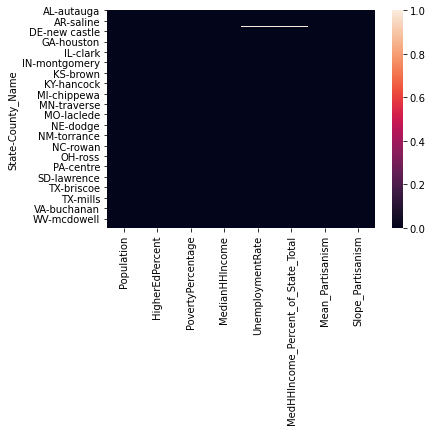

In [68]:
sns.heatmap(county_df.isna())

In [69]:
county_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3007 entries, ('AL', 'autauga') to ('WY', 'weston')
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Population                          3007 non-null   object
 1   HigherEdPercent                     3005 non-null   object
 2   PovertyPercentage                   3000 non-null   object
 3   MedianHHIncome                      3000 non-null   object
 4   UnemploymentRate                    2999 non-null   object
 5   MedHHIncome_Percent_of_State_Total  2999 non-null   object
 6   Mean_Partisanism                    3003 non-null   object
 7   Slope_Partisanism                   3003 non-null   object
dtypes: object(8)
memory usage: 372.1+ KB


In [70]:
county_df.dropna(inplace=True)

In [71]:
county_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2992 entries, ('AL', 'autauga') to ('WY', 'weston')
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Population                          2992 non-null   object
 1   HigherEdPercent                     2992 non-null   object
 2   PovertyPercentage                   2992 non-null   object
 3   MedianHHIncome                      2992 non-null   object
 4   UnemploymentRate                    2992 non-null   object
 5   MedHHIncome_Percent_of_State_Total  2992 non-null   object
 6   Mean_Partisanism                    2992 non-null   object
 7   Slope_Partisanism                   2992 non-null   object
dtypes: object(8)
memory usage: 291.1+ KB


### Outliers

In [72]:
county_df = county_df.astype(float)

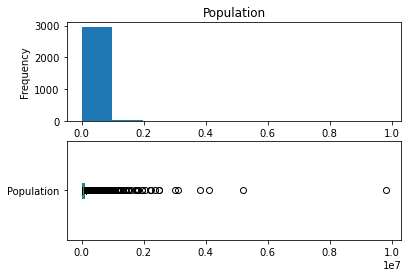

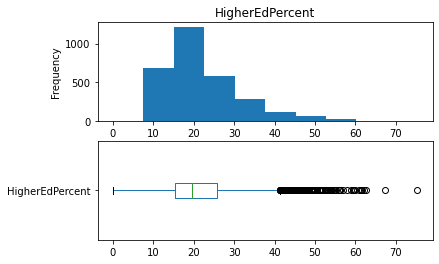

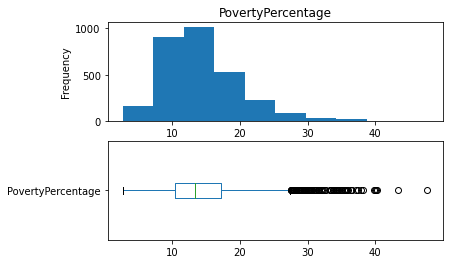

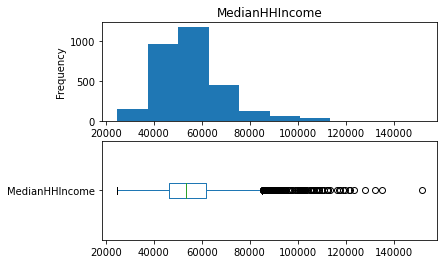

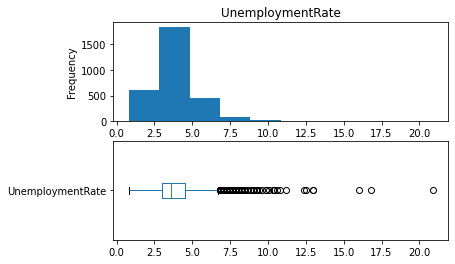

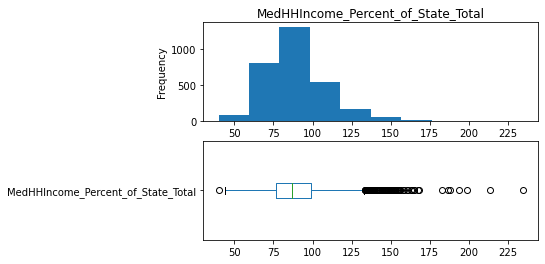

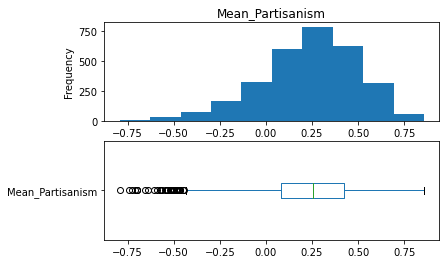

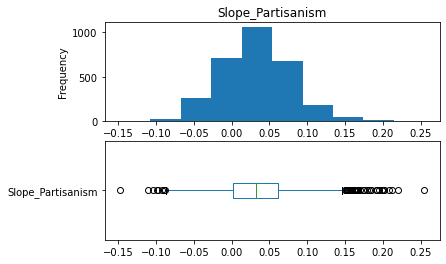

In [73]:
for att in county_df.columns:
    plt.subplot(2,1,1)
    county_df[att].plot.hist()
    plt.title(att)
    plt.subplot(2,1,2)
    county_df[att].plot.box(vert=False)
    plt.show()

In [74]:
county_df['log_Population'] = np.log(county_df.Population)
county_df['log_UnemploymentRate'] = np.log(county_df.UnemploymentRate)

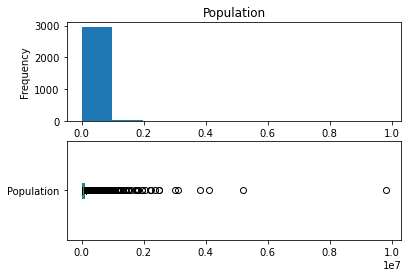

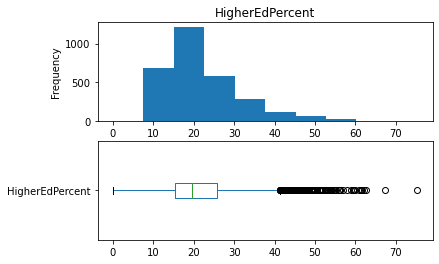

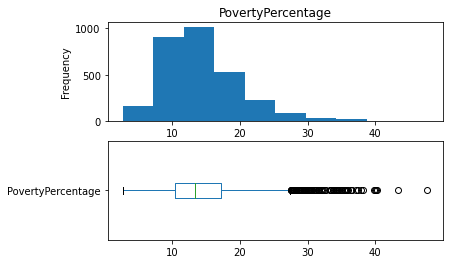

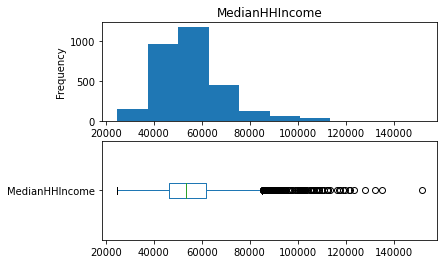

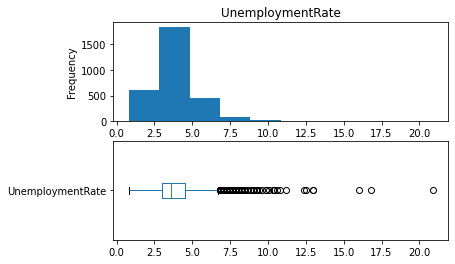

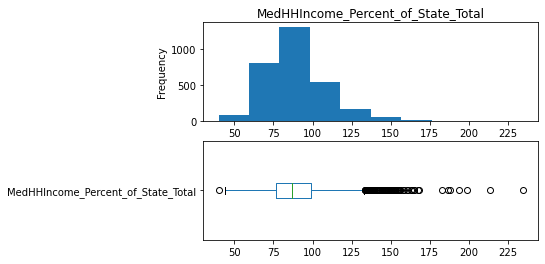

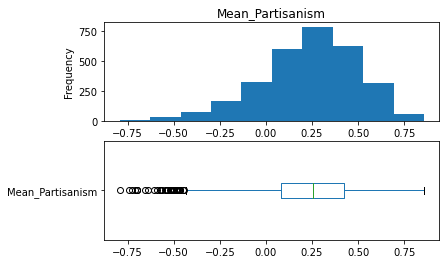

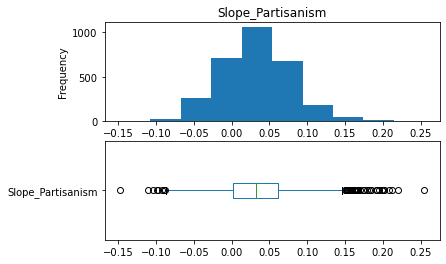

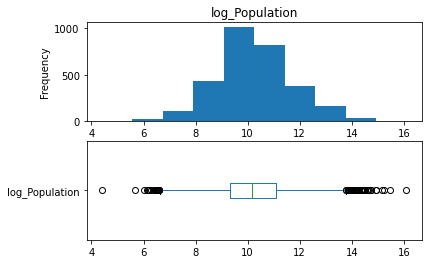

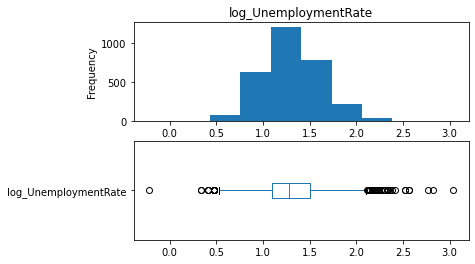

In [75]:
for att in county_df.columns:
    plt.subplot(2,1,1)
    county_df[att].plot.hist()
    plt.title(att)
    plt.subplot(2,1,2)
    county_df[att].plot.box(vert=False)
    plt.show()

## Checking for data redundancy

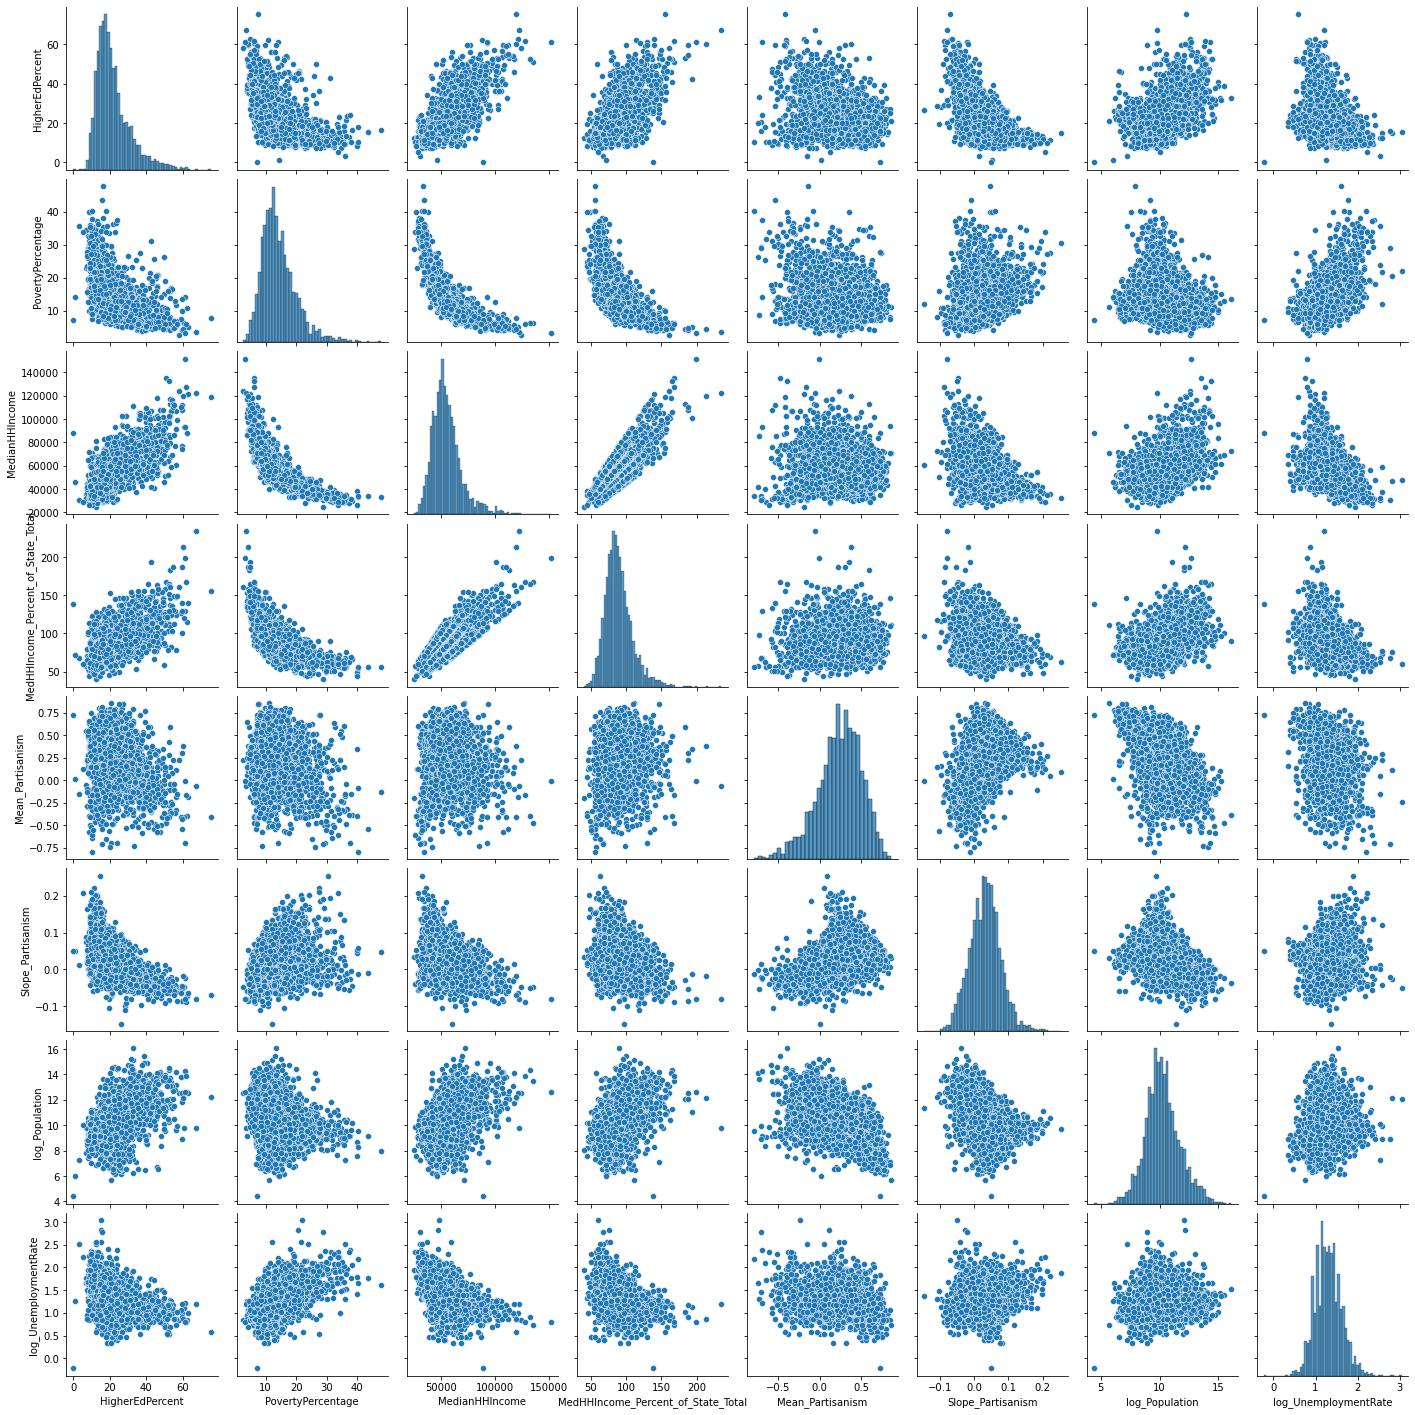

In [76]:
sns.pairplot(county_df.drop(columns=['Population','UnemploymentRate']))
plt.savefig('ScatterMatrix.png',dpi=500)

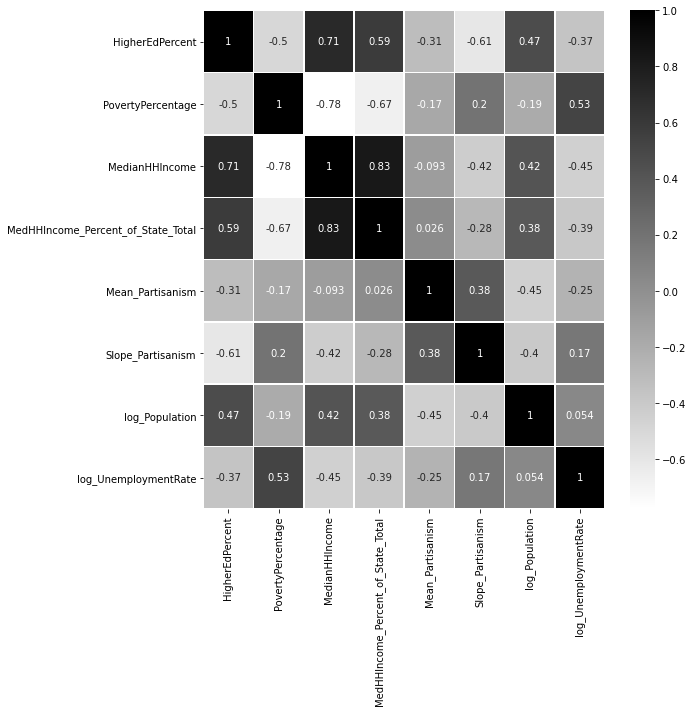

In [77]:
plt.figure(figsize=(10,10))
sns.heatmap(county_df.drop(columns=['Population','UnemploymentRate']).corr(),
            linewidths=.5, annot=True, cmap='binary')
plt.tight_layout()
plt.savefig('Corelation.png',dpi=500)

## The Analysis

### Using PCA to visualize the dataset

In [80]:
Xs = county_df.drop(columns= ['UnemploymentRate','Population','MedianHHIncome'])

Xs = (Xs -Xs.mean())/Xs.std()

In [82]:
from sklearn.decomposition import PCA
pca = PCA()

pca.fit(Xs)

Xs_t = pd.DataFrame(pca.transform(Xs),index = Xs.index)
Xs_t.columns = ['PC{}'.format(i) for i in range(1,8)]

In [83]:
total_variance = Xs_t.var().sum()
dic = {'variance_percentage':Xs_t.var()/total_variance,
       'cumulative_variance_percentage':
       Xs_t.var().cumsum()/total_variance}

explanation_df = pd.DataFrame(dic)
explanation_df

,variance_percentage,cumulative_variance_percentage
PC1,0.430413,0.430413
PC2,0.258362,0.688775
PC3,0.107205,0.795980
PC4,0.065688,0.861668
PC5,0.058344,0.920012
PC6,0.043211,0.963223
PC7,0.036777,1.000000


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

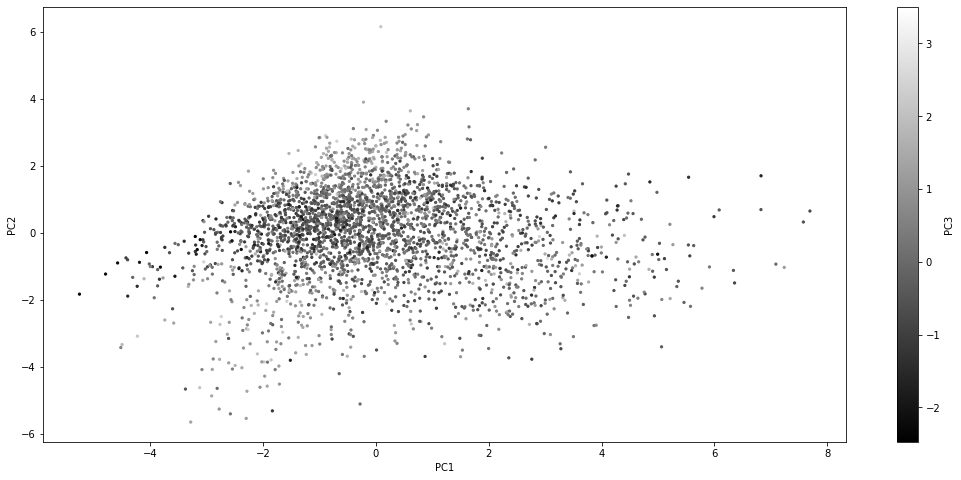

In [84]:
Xs_t.plot.scatter(x='PC1',y='PC2',c='PC3',sharex=False,colormap ='gray',marker='.',figsize=(18,8))

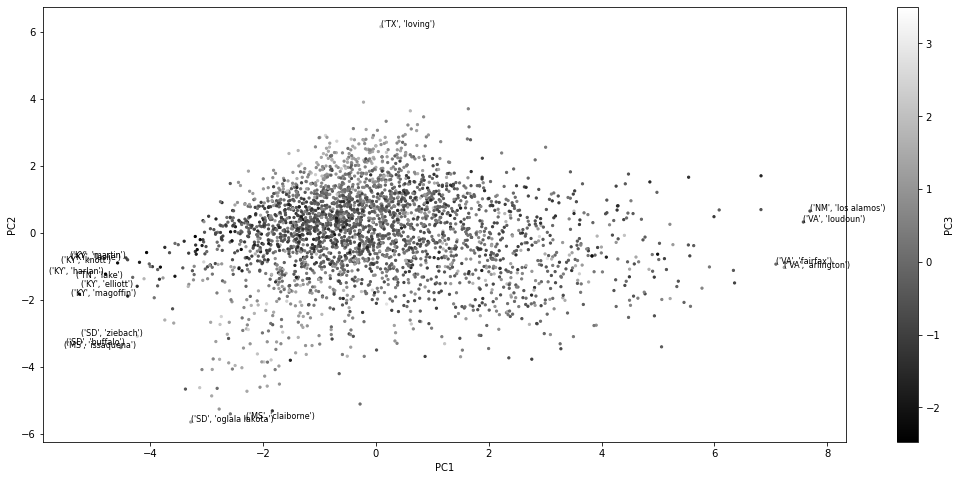

In [89]:
Xs_t.plot.scatter(x='PC1',y='PC2',c='PC3',sharex=False,colormap ='gray',marker='.',figsize=(18,8))

for i, row in Xs_t.iterrows():
    if(row.PC1>7 or row.PC2<-5.5 or row.PC2>4):
        plt.annotate(i, (row.PC1, row.PC2),size=8)
    if(row.PC1<-4.2):
        plt.annotate(i, (row.PC1-1, row.PC2),size=8)
plt.savefig('PCs.png',dpi=900)

### K-Means Clustering Analysis

In [104]:
Xs = county_df.drop(columns= ['UnemploymentRate','Population','MedianHHIncome'])

Xs = (Xs -Xs.min())/(Xs.max()-Xs.min())

#### Computational experimentations to find K

In [110]:
from sklearn.cluster import KMeans
repetitions = ['R{}'.format(i) for i in range(1,10)]

SSE_results = pd.DataFrame(0.0, index = range(2,10), 
                       columns= repetitions)


for n_cluster in SSE_results.index:
    for col in SSE_results.columns:
        algort = KMeans(n_clusters=n_cluster).fit(Xs)
        SSE_results.at[n_cluster,col] = algort.inertia_ 
        # Inertia: Sum of distances of samples to their closest cluster center

SSE_results['Mean'] = SSE_results[repetitions].mean(axis=1)
SSE_results['Var'] = SSE_results[repetitions].var(axis=1)
SSE_results.sort_values('Mean')

,R1,R2,R3,R4,R5,R6,R7,R8,R9,Mean,Var
9,112.793684,112.752322,112.792071,112.783693,112.748151,112.751262,112.780707,112.744820,112.742896,112.765512,4.598130e-04
8,118.096947,118.095059,118.254417,118.108631,118.097773,118.111378,118.112873,118.098937,118.099316,118.119481,2.604844e-03
7,124.573840,124.569070,124.607084,124.675891,124.583570,124.675230,124.573912,124.676423,124.573202,124.612025,2.414742e-03
6,132.515606,132.515317,132.517037,132.515588,132.515317,132.515317,132.518742,132.515317,132.515606,132.515983,1.367255e-06
5,143.716441,143.715593,143.716095,143.716095,143.715174,143.716095,143.715593,143.715096,143.718224,143.716045,8.722930e-07
4,162.154985,162.162328,162.162328,162.160253,162.153380,162.162328,162.159873,162.155849,162.162328,162.159295,1.293536e-05
3,185.423796,185.423796,185.424564,185.423796,185.424564,185.424564,185.420385,185.423796,185.424564,185.423758,1.747208e-06
2,229.545849,229.545849,229.545849,229.545849,229.545849,229.545912,229.546077,229.545849,229.545849,229.545881,5.783127e-09


<AxesSubplot:>

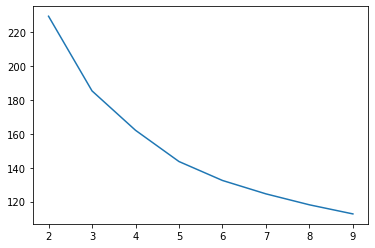

In [284]:
SSE_results.Mean.plot()

In [285]:
from sklearn.metrics import silhouette_score
repetitions = ['R{}'.format(i) for i in range(1,10)]

SIL_results = pd.DataFrame( index = range(2,10), 
                       columns= repetitions)


for n_cluster in SIL_results.index:
    for col in SIL_results.columns:
        algort = KMeans(n_clusters=n_cluster).fit(Xs)
        SIL_results.at[n_cluster,col] = silhouette_score(Xs,algort.labels_)
        
SIL_results['Mean'] = SIL_results[repetitions].mean(axis=1)
SIL_results['Var'] = SIL_results[repetitions].var(axis=1)
SIL_results.sort_values('Mean',ascending=False)

,R1,R2,R3,R4,R5,R6,R7,R8,R9,Mean,Var
2,0.290016,0.289844,0.290016,0.290016,0.289844,0.289844,0.289844,0.289844,0.289844,0.289901,7.395607e-09
3,0.227539,0.227539,0.228016,0.229023,0.227539,0.22896,0.227539,0.227589,0.23119,0.228326,1.525486e-06
4,0.206167,0.204784,0.205682,0.205748,0.204333,0.203092,0.204431,0.2047,0.206166,0.205011,1.036484e-06
5,0.199699,0.199818,0.199881,0.199818,0.199779,0.199699,0.199779,0.199818,0.199831,0.199791,3.637661e-09
6,0.194488,0.194488,0.194488,0.194488,0.194526,0.194488,0.194488,0.194488,0.19455,0.194499,5.233984e-10
7,0.176485,0.176393,0.176348,0.17154,0.176172,0.176519,0.176355,0.176493,0.176716,0.175891,2.684799e-06
8,0.171261,0.170907,0.171012,0.169614,0.171942,0.169818,0.170799,0.170918,0.16837,0.170516,1.142087e-06
9,0.164349,0.165093,0.164745,0.164669,0.166027,0.164636,0.16413,0.163948,0.168701,0.165144,2.146096e-06


<AxesSubplot:>

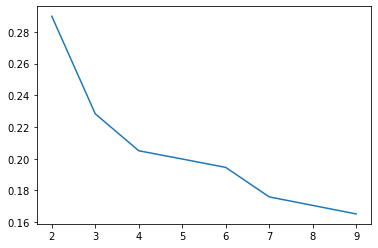

In [286]:
SIL_results.Mean.plot()

### The clustering

In [107]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(Xs)

for i in range(5):
    BM = kmeans.labels_==i
    print('Cluster {}: Size={}'.format(i,sum(BM)))
    print(county_df[BM].index.values)
    print('--------------------------------------')

Cluster 0: Size=573
[('AL', 'blount') ('AL', 'chilton') ('AL', 'cleburne') ('AL', 'crenshaw')
 ('AL', 'cullman') ('AL', 'geneva') ('AL', 'marshall') ('AL', 'st. clair')
 ('CA', 'sierra') ('CO', 'baca') ('CO', 'cheyenne') ('CO', 'custer')
 ('CO', 'dolores') ('CO', 'hinsdale') ('CO', 'jackson') ('CO', 'kiowa')
 ('CO', 'kit carson') ('CO', 'lincoln') ('CO', 'logan') ('CO', 'mineral')
 ('CO', 'moffat') ('CO', 'phillips') ('CO', 'prowers')
 ('CO', 'rio blanco') ('CO', 'sedgwick') ('CO', 'washington')
 ('CO', 'yuma') ('FL', 'baker') ('FL', 'lafayette') ('GA', 'banks')
 ('GA', 'dawson') ('GA', 'echols') ('GA', 'fannin') ('GA', 'gilmer')
 ('GA', 'glascock') ('GA', 'habersham') ('GA', 'haralson')
 ('GA', 'jackson') ('GA', 'jasper') ('GA', 'lee') ('GA', 'lumpkin')
 ('GA', 'madison') ('GA', 'oglethorpe') ('GA', 'pickens') ('GA', 'pike')
 ('GA', 'rabun') ('GA', 'towns') ('GA', 'union') ('GA', 'white')
 ('ID', 'adams') ('ID', 'bear lake') ('ID', 'bingham') ('ID', 'boise')
 ('ID', 'boundary') ('ID',

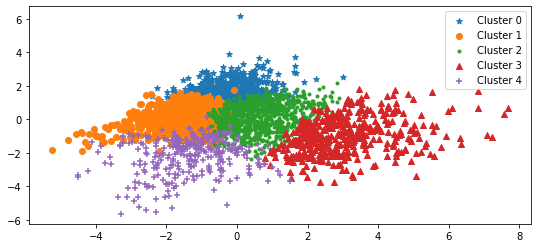

In [115]:
clusters = ['Cluster {}'.format(i) for i in range(5)]
plt.figure(figsize=(9,4))
markerlist = ['*','o','.','^','+']
for i,clst in enumerate(clusters):
    BM = kmeans.labels_==i
    wdf = Xs_t[BM]
    plt.scatter(wdf.PC1,wdf.PC2, marker =markerlist[i] ,label=clst)
plt.legend()
plt.savefig('ClustersInPCs.png',dpi=900)

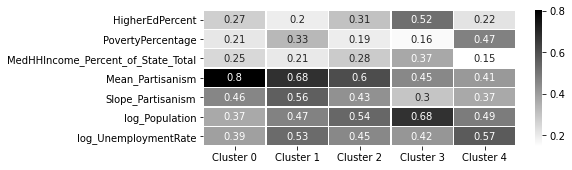

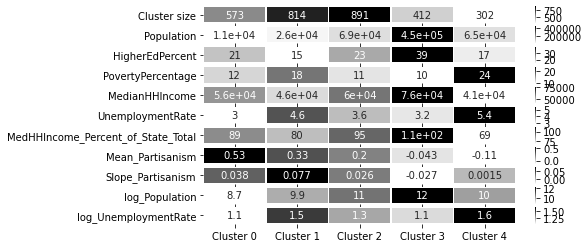

In [108]:
clusters = ['Cluster {}'.format(i) for i in range(5)]

Centroids = pd.DataFrame(0.0, index =  clusters, columns = Xs.columns)
centrodis_orig = pd.DataFrame(0.0, index =  clusters, columns = county_df.columns)
size_df = pd.DataFrame(0.0, index =  clusters, columns = ['Cluster size'])

plt.figure(figsize=(7,2.5))
for i,clst in enumerate(clusters):
    BM = kmeans.labels_==i
    Centroids.loc[clst] = Xs[BM].mean(axis=0)
    centrodis_orig.loc[clst] = county_df[BM].mean()
    size_df.loc[clst] = sum(BM)

sns.heatmap(Centroids.transpose(), linewidths=.5, annot=True, cmap='binary')
plt.show()

plt.figure(figsize=(7,4))
plt.subplot(11,1,1)
sns.heatmap(size_df.transpose(), linewidths=.5, annot=True, cmap='binary',fmt='g')
plt.yticks(rotation=0)
for i,att in enumerate(county_df.columns):
    plt.subplot(11,1,i+2)
    sns.heatmap(centrodis_orig[[att]].transpose(), linewidths=.5, annot=True, cmap='binary')
    plt.yticks(rotation=0)
plt.show()